In [1]:
import pandas as pd

In [2]:
from IPython.core.display import HTML
HTML('<style>{}</style>'.format(open('style-notebook.css').read()))

### Define the column names and read data from source file 

In [3]:
col_names = ['index', 'name', 'citation', 'author', 'number', 'date', 'court', 'coram', 'counsel', 'catchwords']
df = pd.read_table('raw.tsv', encoding='utf-8', header=None, names=col_names, index_col=0, parse_dates=True)

In [4]:
df.head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12479,Lee Kok Yong v Lee Guek Hua (alias Li Yuehua),[2007] SGHC 26,Tan Lee Meng J:,"D 1404/2004, RAS 95/2006, 96/2006",27 Feb 2007,High Court,Tan Lee Meng J,Lim Say Fang (Tan Lee & Partners) for the appe...,NaN
12480,Chia Kin Tuck v Leong Choon Kum and Another,[2005] SGHC 1,Lai Siu Chiu J:,"DC(T) 600872/2000, DA 23/2003, 24/2003, 25/200...",04 Jan 2005,High Court,Lai Siu Chiu J,Koh Tien Hua and Michelle Elias (Harry Elias P...,Restitution
12481,Ong and Co Pte Ltd v Lua Soo Theng,[2005] SGHC 6,MPH Rubin J:,Suit 98/2003,14 Jan 2005,High Court,MPH Rubin J,Andrew Ong Hock Sing and Tan Chuan Bing Kendal...,Contract
12482,Law Society of Singapore v Tay Soo Wan,[2005] SGHC 7,Yong Pung How CJ (delivering the judgment of t...,OS 987/2004,07 Jan 2005,High Court,"Chao Hick Tin JA, Tay Yong Kwang J, Yong Pung ...",Zaheer K Merchant (Madhavan Partnership) for a...,Legal Profession
12483,Koon Seng Construction Pte Ltd v Siem Seng Hin...,[2005] SGHC 8,MPH Rubin J:,"OS 1365/2000, Suit 268/2004",13 Jan 2005,High Court,MPH Rubin J,N Sreenivasan (Straits Law Practice LLC) for p...,Contract


### Quick check on the summary statistics of the data set

In [5]:
df.describe()

,name,citation,author,number,date,court,coram,counsel,catchwords
count,5399,5399,4511,5399,5399,5399,5399,5399,5293
unique,4908,5391,283,5281,2962,5,443,5334,3284
top,Lai Swee Lin Linda v Attorney-General,[2015] SGCA 59,Choo Han Teck J:,Criminal Case No 1 of 2012,26 August 2010,High Court,Choo Han Teck J,"Toh Kian Sing SC, Leong Kah Wah and Koh See Bi...",Civil Procedure
freq,7,2,484,4,10,4357,499,4,236


There are only 5399 unique citations when there are 5391 judgments in the data set. This suggests that there may be duplicate entries. 

### Removing duplicate entries based on the citation

In [6]:
df[df.duplicated('citation')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15509,The “Titan Unity”,[2014] SGHCR 4,Shaun Leong Li Shiong AR:,Admiralty in Rem No 276 of 2012(Summons No 395...,4 February 2014,High Court,Shaun Leong Li ShiongAR,"Mr Toh Kian Sing SC, Mr Ting Yong Hong and MrN...",Arbitration – International Arbitration Act (C...
15746,TYC Investment Pte Ltd and others v TayYun Chw...,[2014] SGHC 192,Lee Kim Shin JC:,Originating Summons No 895 of 2013,10 October 2014,High Court,Lee Kim Shin JC,"Thio Shen Yi, SC, Lim Shaochun, Freddie and Ta...",Companies – directors – powers – duties;Compan...
15777,Mahidon Nichiar Binte Mohd Ali and others v Da...,[2014] SGHC 207,Lee Kim Shin JC:,Suit No 251 of 2013,17 October 2014,High Court,Lee Kim Shin JC,Bernard Sahagar (Lee Bon Leong & Co) for the p...,Civil procedure – limitation;Contract – mistak...
15779,Koh Jing Kwang v Public Prosecutor,[2014] SGHC 213,See Kee Oon JC:,Magistrate’s Appeal No 221 of 2013,27 October 2014,High Court,See Kee Oon JC,Ramesh Tiwary (Messrs Ramesh Tiwary) for the a...,CRIMINAL LAW – Offences – Grievous hurt;CRIMIN...
15825,Fairmacs Shipping & Transport Services Pte Ltd...,[2014] SGHC 262,Belinda Ang Saw Ean J:,Admiralty in Personam No 324 of 2011 (Registra...,12 December 2014,High Court,Belinda Ang Saw Ean J,Joseph Tan and Joanna Poh (Legal Solutions LLC...,Tort – Conversion;Damages – Assessment
16039,AQW v Public Prosecutor,[2015] SGHC 134,Sundaresh Menon CJ:,Magistrate’s Appeal No 155 of 2014,19 May 2015,High Court,Sundaresh Menon CJ,The appellant in person; Christine Liu and Cla...,Criminal Law – Offences – Sexual offences – Se...
18274,Tan Seet Eng v Attorney-General and another ma...,[2015] SGCA 59,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 201 of 2014 and Summons No 263...,25 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Hamidul Haq, Thong Chee Kun, Ho Li Fong and Is...",Administrative law â€“ procedure;Administrativ...
18283,Attorney-General v Aljunied-Hougang-Punggol Ea...,[2015] SGCA 60,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 114 of 2015; Summons No 258 of...,27 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Aurill Kam, Nathaniel Khng and Germaine Boey (...",Civil Procedure â€”Parties â€”Joinder;Statutor...


In [7]:
df[df.citation.str.contains('\[2014\] SGHCR 4')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15494,The “Titan Unity”,[2014] SGHCR 4,Shaun Leong Li Shiong AR:,Admiralty in Rem No 276 of 2012 (Summons No 39...,4 February 2014,High Court,Shaun Leong Li Shiong AR,"Mr Toh Kian Sing SC, Mr Ting Yong Hong and Mr ...",Arbitration – International Arbitration Act (C...
15509,The “Titan Unity”,[2014] SGHCR 4,Shaun Leong Li Shiong AR:,Admiralty in Rem No 276 of 2012(Summons No 395...,4 February 2014,High Court,Shaun Leong Li ShiongAR,"Mr Toh Kian Sing SC, Mr Ting Yong Hong and MrN...",Arbitration – International Arbitration Act (C...


We drop the duplicate rows from the data set.

In [8]:
df = df.drop(15509)

In [9]:
df[df.citation.str.contains('\[2014\] SGHC 192')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15733,TYC Investment Pte Ltd and others v Tay Yun Ch...,[2014] SGHC 192,Lee Kim Shin JC:,Originating Summons No 895 of 2013,10 October 2014,High Court,Lee Kim Shin JC,"Thio Shen Yi, SC, Lim Shaochun, Freddie and Ta...",Companies – directors – powers – duties;Compan...
15746,TYC Investment Pte Ltd and others v TayYun Chw...,[2014] SGHC 192,Lee Kim Shin JC:,Originating Summons No 895 of 2013,10 October 2014,High Court,Lee Kim Shin JC,"Thio Shen Yi, SC, Lim Shaochun, Freddie and Ta...",Companies – directors – powers – duties;Compan...


In [10]:
df = df.drop(15746)

In [11]:
df[df.citation.str.contains('\[2014\] SGHC 207')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15751,Mahidon Nichiar Binte Mohd Ali and others v Da...,[2014] SGHC 207,Lee Kim Shin JC:,Suit No 251 of 2013,17 October 2014,High Court,LeeKim Shin JC,Bernard Sahagar (Lee Bon Leong & Co) forthe pl...,Civil procedure – limitation;Contract – mistak...
15777,Mahidon Nichiar Binte Mohd Ali and others v Da...,[2014] SGHC 207,Lee Kim Shin JC:,Suit No 251 of 2013,17 October 2014,High Court,Lee Kim Shin JC,Bernard Sahagar (Lee Bon Leong & Co) for the p...,Civil procedure – limitation;Contract – mistak...


In [12]:
df = df.drop(15751)

In [13]:
df[df.citation.str.contains('\[2014\] SGHC 213')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15755,Koh Jing Kwang v PublicProsecutor,[2014] SGHC 213,See Kee Oon JC:,Magistrate’s Appeal No 221 of 2013,27 October 2014,High Court,See Kee Oon JC,Ramesh Tiwary (Messrs Ramesh Tiwary) for theap...,CRIMINAL LAW – Offences – Grievoushurt;CRIMINA...
15779,Koh Jing Kwang v Public Prosecutor,[2014] SGHC 213,See Kee Oon JC:,Magistrate’s Appeal No 221 of 2013,27 October 2014,High Court,See Kee Oon JC,Ramesh Tiwary (Messrs Ramesh Tiwary) for the a...,CRIMINAL LAW – Offences – Grievous hurt;CRIMIN...


In [14]:
df = df.drop(15755)

In [15]:
df[df.citation.str.contains('\[2014\] SGHC 262')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15800,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 262,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...
15825,Fairmacs Shipping & Transport Services Pte Ltd...,[2014] SGHC 262,Belinda Ang Saw Ean J:,Admiralty in Personam No 324 of 2011 (Registra...,12 December 2014,High Court,Belinda Ang Saw Ean J,Joseph Tan and Joanna Poh (Legal Solutions LLC...,Tort – Conversion;Damages – Assessment


These are not duplicates but are instead different entries with identical citations.

In [16]:
df[df.citation.str.contains('\[2014\] SGHC 242')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15814,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 242,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...


In [17]:
df[df.name.str.contains('Ong Kian Hoy')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15800,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 262,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...
15814,Ong Kian Hoy v Liquidator of HSS Engineering P...,[2014] SGHC 242,Judith Prakash J:,Originating Summons No 1011 of 2013,19 November 2014,High Court,Judith Prakash J,A P Thirumurthy (Murthy & Co) for the plaintif...,Insolvency law – Winding up – Liquidator – Pro...


A check on http://commonlii.org shows that the citation for judgment 15800 should be [2014] SGHC 242 and it turns out there is already an identical judgment 15814 with the correct citation in the data set, so we drop 15800 in favour of 15814.

In [18]:
df = df.drop(15800)

In [19]:
df[df.citation.str.contains('\[2015\] SGHC 134')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
16030,GAJ v Public Prosecutor,[2015] SGHC 134,Sundaresh Menon CJ:,Magistrate’s Appeal No 155 of 2014,19 May 2015,High Court,Sundaresh Menon CJ,The appellant in person; Christine Liu and Cla...,Criminal Law – Offences – Sexual offences – Se...
16039,AQW v Public Prosecutor,[2015] SGHC 134,Sundaresh Menon CJ:,Magistrate’s Appeal No 155 of 2014,19 May 2015,High Court,Sundaresh Menon CJ,The appellant in person; Christine Liu and Cla...,Criminal Law – Offences – Sexual offences – Se...


In [20]:
df = df.drop(16030)

In [21]:
df[df.citation.str.contains('\[2015\] SGCA 59')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18218,Tan Seet Eng v Attorney-General and another ma...,[2015] SGCA 59,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 201 of 2014 and Summons No 263...,25 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Hamidul Haq, Thong Chee Kun, Ho Li Fong and Is...",Administrative law - procedure;Administrative ...
18274,Tan Seet Eng v Attorney-General and another ma...,[2015] SGCA 59,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 201 of 2014 and Summons No 263...,25 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Hamidul Haq, Thong Chee Kun, Ho Li Fong and Is...",Administrative law â€“ procedure;Administrativ...


In [22]:
df = df.drop(18274)

In [23]:
df[df.citation.str.contains('\[2015\] SGCA 60')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18222,Attorney-General v Aljunied-Hougang-Punggol Ea...,[2015] SGCA 60,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 114 of 2015; Summons No 258 of...,27 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Aurill Kam, Nathaniel Khng and Germaine Boey (...",Civil Procedure -Parties -Joinder;Statutory In...
18283,Attorney-General v Aljunied-Hougang-Punggol Ea...,[2015] SGCA 60,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 114 of 2015; Summons No 258 of...,27 November 2015,Court of Appeal,Sundaresh Menon CJ; Chao Hick Tin JA; Andrew P...,"Aurill Kam, Nathaniel Khng and Germaine Boey (...",Civil Procedure â€”Parties â€”Joinder;Statutor...


In [24]:
df = df.drop(18283)

### Cleaning the citation column 

A quick way of checking whether any values of the citation column is in the wrong format, is to split the values.

In [25]:
cits = df.citation.str.split(';', expand=True)
cits.columns = ['neutral', 'slr']
cits.head(20)

,neutral,slr
index,,
12479,[2007] SGHC 26,None
12480,[2005] SGHC 1,None
12481,[2005] SGHC 6,None
12482,[2005] SGHC 7,None
12483,[2005] SGHC 8,None
12484,[2005] SGHC 10,None
12485,[2005] SGCA 1,None
12486,[2005] SGCA 3,None
12487,[2005] SGCA 4,None


In [26]:
swap_idx = cits.slr.notnull() 
cits.loc[swap_idx, ['neutral', 'slr']] = cits.loc[swap_idx, ['slr', 'neutral']].values
cits.head(20)

,neutral,slr
index,,
12479,[2007] SGHC 26,None
12480,[2005] SGHC 1,None
12481,[2005] SGHC 6,None
12482,[2005] SGHC 7,None
12483,[2005] SGHC 8,None
12484,[2005] SGHC 10,None
12485,[2005] SGCA 1,None
12486,[2005] SGCA 3,None
12487,[2005] SGCA 4,None


Check whether the neutral citation has the right format.

In [27]:
cits[cits.neutral.str.split().str.len()!=3]

,neutral,slr
index,,
15265,[2013] SGHC115,None
17912,[2010] SGHC 2000 Rgr,None
17913,[2010] SGHC 3000 (Rg),None


Judgment 15625 did not split correctly because of a missing space.

In [28]:
df.loc[15265, 'citation'] = '[2013] SGHC 115'

In [29]:
df.loc[[17912, 17913]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17912,Public Prosecutor v ABJ,[2010] SGHC 2000 Rgr,Yeong Zee Kin SAR (delivering the grounds of d...,Criminal Appeal No 15 of 2009,21 January 2010,High Court,Yeong Zee Kin SAR,"Bala Reddy, Gordon Oh and Peggy Pao (Attorney-...",Criminal Procedure and Sentencing
17913,Public Prosecutor v ABJ,[2010] SGHC 3000 (Rg),Yeong Zee Kin SAR (delivering the grounds of d...,Criminal Appeal No 15 of 2009,21 January 2010,High Court,Yeong Zee Kin SAR,"Bala Reddy, Gordon Oh and Peggy Pao (Attorney-...",Criminal Procedure and Sentencing


In [30]:
df[df.name.str.contains('ABJ')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
13789,Public Prosecutor v ABJ,[2009] SGHC 185,Choo Han Teck J:,CC 29/2009,14 Aug 2009,High Court,Choo Han Teck J,Gordon Oh (Deputy Public Prosecutor) for the p...,Criminal Procedure and Sentencing
14027,Public Prosecutor v ABJ,[2010] SGCA 1,Andrew Phang Boon Leong JA (delivering the gro...,Criminal Appeal No 15 of 2009,21 January 2010,Court of Appeal,"Andrew Phang Boon Leong JA, V K Rajah JA, Tay ...","Bala Reddy, Gordon Oh and Peggy Pao (Attorney-...",Criminal Procedure and Sentencing
17912,Public Prosecutor v ABJ,[2010] SGHC 2000 Rgr,Yeong Zee Kin SAR (delivering the grounds of d...,Criminal Appeal No 15 of 2009,21 January 2010,High Court,Yeong Zee Kin SAR,"Bala Reddy, Gordon Oh and Peggy Pao (Attorney-...",Criminal Procedure and Sentencing
17913,Public Prosecutor v ABJ,[2010] SGHC 3000 (Rg),Yeong Zee Kin SAR (delivering the grounds of d...,Criminal Appeal No 15 of 2009,21 January 2010,High Court,Yeong Zee Kin SAR,"Bala Reddy, Gordon Oh and Peggy Pao (Attorney-...",Criminal Procedure and Sentencing


Judgment 17912 and 17913 appear to be erroneous records so they are dropped.

In [31]:
df = df.drop([17912, 17913])

Quick check of the different components of the neutral citation.

In [32]:
for i in range(3):
    print(cits.neutral.str.split(expand=True)[i].value_counts())

[2010]    427
[2015]    398
[2016]    362
[2009]    355
[2014]    354
[2013]    347
[2012]    338
[2011]    337
[2005]    296
[2008]    295
[2006]    290
[2007]    283
[2002]    254
[2017]    247
[2003]    209
[2001]    208
[2000]    201
[2004]    190
Name: 0, dtype: int64
SGHC       4250
SGCA       1012
SGHCR       109
SGHC(I)      13
SGHCF         4
SGCA(I)       2
SGHC115       1
Name: 1, dtype: int64
1       43
3       42
2       42
4       41
5       40
6       39
8       38
7       38
10      37
16      37
22      36
13      36
27      35
15      35
11      35
23      35
21      35
19      35
26      34
14      34
28      34
17      34
25      34
9       34
20      34
42      33
24      33
46      33
36      33
44      33
        ..
3000     1
371      1
343      1
357      1
344      1
1274     1
2254     1
351      1
375      1
342      1
9027     1
356      1
366      1
340      1
332      1
373      1
352      1
355      1
361      1
2000     1
374      1
337      1
1176     

We know that the highest number of cases in a year was 427 in 2010, so we shouldn't be seeing 4 digit numbers in the final part of the neutral citation.

In [33]:
cits[cits.neutral.str.split(expand=True)[2].str.len() > 3]

,neutral,slr
index,,
14786,[2012] SGHCR 9027,None
17912,[2010] SGHC 2000 Rgr,None
17913,[2010] SGHC 3000 (Rg),None
17915,[2011] SGHC 1111,None
17916,[2011] SGHC 1176,None
17921,[2012] SGHCR 9010,None
18026,[2015] SGCA(I) 1041,None
18039,[2015] SGHC(I) 1204,None
18040,[2015] SGHCF 1274,None


In [34]:
df.loc[[14786]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14786,Erin Brooke Mullin and another v Rosli Bin Sal...,[2012] SGHCR 9027,Lai Siu Chiu J:,Suit No 540 of 2010,3 March 2012,High Court,Lai Siu Chiu J,Mr Sarjeet Singh s/o Gummer Singh (Acies Law C...,Tort – Negligence – Motor Accident – Liability


In [35]:
df[df.name.str.contains('Erin Brooke')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14785,Erin Brooke Mullin and another v Rosli Bin Sal...,[2012] SGHC 27,Lai Siu Chiu J:,Suit No 540 of 2010,3 February 2012,High Court,Lai Siu Chiu J,Mr Sarjeet Singh s/o Gummer Singh (Acies Law C...,Tort – Negligence – Motor Accident – Liability
14786,Erin Brooke Mullin and another v Rosli Bin Sal...,[2012] SGHCR 9027,Lai Siu Chiu J:,Suit No 540 of 2010,3 March 2012,High Court,Lai Siu Chiu J,Mr Sarjeet Singh s/o Gummer Singh (Acies Law C...,Tort – Negligence – Motor Accident – Liability


In [36]:
df = df.drop(14786)

In [37]:
df.loc[[17915]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17915,Public Prosecutor v Mohammad Ashik bin Aris,[2011] SGHC 1111,Chan Seng Onn J:,Criminal Case No. 25 of 2010,3 May 2011,High Court,; Chan Seng Onn J;,"Mr Anandan Bala, Ms Stella Tan & Ms Peggy Pao ...",NaN


In [38]:
df[df.name.str.contains('Ashik bin Aris')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14564,Public Prosecutor v Mohammad Ashik bin Aris,[2011] SGHC 111,Chan Seng Onn J:,Criminal Case No. 25 of 2010,3 May 2011,High Court,Chan Seng Onn J,"Mr Anandan Bala, Ms Stella Tan & Ms Peggy Pao ...",Criminal law – Statutory offences – Misuse of ...
14664,Mohammad Ashik bin Aris v Public Prosecutor,[2011] SGCA 46,Chan Sek Keong CJ (delivering the grounds of d...,Criminal Appeal No 10 of 2011,7 September 2011,Court of Appeal,"Chan Sek Keong CJ, Andrew Phang Boon Leong JA ...",S K Kumar (S K Kumar Law Practice LLP) for the...,Criminal Law – Misuse of Drugs Act;Evidence
17915,Public Prosecutor v Mohammad Ashik bin Aris,[2011] SGHC 1111,Chan Seng Onn J:,Criminal Case No. 25 of 2010,3 May 2011,High Court,; Chan Seng Onn J;,"Mr Anandan Bala, Ms Stella Tan & Ms Peggy Pao ...",NaN


In [39]:
df = df.drop(17915)

In [40]:
df.loc[[17916]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17916,Ferrero SPA v Sarika Connoisseur Cafe Pte Ltd,[2011] SGHC 1176,Chan Seng Onn J:,Suit No 9 of 2010,26 July 2011,High Court,Chan Seng Onn J,"M Ravindran, Sukumar Karuppiah and Justin Blaz...",NaN


In [41]:
df[df.name.str.contains('Ferrero SPA')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14634,Ferrero SPA v Sarika Connoisseur Cafe Pte Ltd,[2011] SGHC 176,Chan Seng Onn J:,Suit No 9 of 2010,26 July 2011,High Court,Chan Seng Onn J,"M Ravindran, Sukumar Karuppiah and Justin Blaz...",TRADE MARKS AND TRADE NAMES;TORT
17916,Ferrero SPA v Sarika Connoisseur Cafe Pte Ltd,[2011] SGHC 1176,Chan Seng Onn J:,Suit No 9 of 2010,26 July 2011,High Court,Chan Seng Onn J,"M Ravindran, Sukumar Karuppiah and Justin Blaz...",NaN


In [42]:
df = df.drop(17916)

In [43]:
df.loc[[17921]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17921,Testing SHGCR A v Testing SHGCR B,[2012] SGHCR 9010,Chan Seng Onn J:,Originating Summons No 591 of 2011,13 January 2012,High Court,Andrew ABC AR,Foo Soon Yien (Bernard & Rada Law Corporation)...,Companies


In [44]:
df[df.number.str.contains('591 of 2011')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14758,Low Hian Chor v Steel Forming & Rolling Specia...,[2012] SGHC 10,Chan Seng Onn J:,Originating Summons No 591 of 2011,13 January 2012,High Court,Chan Seng Onn J,Foo Soon Yien (Bernard & Rada Law Corporation)...,Companies
17921,Testing SHGCR A v Testing SHGCR B,[2012] SGHCR 9010,Chan Seng Onn J:,Originating Summons No 591 of 2011,13 January 2012,High Court,Andrew ABC AR,Foo Soon Yien (Bernard & Rada Law Corporation)...,Companies


In [45]:
df = df.drop(17921)

In [46]:
df.loc[[18026]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18026,Woo Kah Wai and another v Chew Ai Hua Sandra a...,[2015] SGCA(I) 1041,Chao Hick Tin JA (delivering the judgment of t...,Civil Appeals Nos 83 and 84 of 2013,03 January 2015,Court of Appeal,"Sundaresh Menon CJ, Chao Hick Tin JA and Andre...",Edmund Kronenburg and Alicia Zhuang (Braddell ...,Contract - Contractual Terms - Breach;Contract...


In [47]:
df[df.name.str.contains('Woo Kah Wai')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15281,"Chew Ai Hua, Sandra v Woo Kah Wai and another ...",[2013] SGHC 120,Lionel Yee JC:,Suit No 448 of 2011/Q,28 June 2013,High Court,Lionel Yee JC,Christopher Anand Daniel (instructed) and Lim ...,Contract – Formation;Contract – Contractual te...
15668,Woo Kah Wai and another v Chew Ai Hua Sandra a...,[2014] SGCA 41,Chao Hick Tin JA (delivering the judgment of t...,Civil Appeals Nos 83 and 84 of 2013,1 August 2014,Court of Appeal,"Sundaresh Menon CJ, Chao Hick Tin JA and Andre...",Edmund Kronenburg and Alicia Zhuang (Braddell ...,Contract – Contractual Terms – Breach;Contract...
18026,Woo Kah Wai and another v Chew Ai Hua Sandra a...,[2015] SGCA(I) 1041,Chao Hick Tin JA (delivering the judgment of t...,Civil Appeals Nos 83 and 84 of 2013,03 January 2015,Court of Appeal,"Sundaresh Menon CJ, Chao Hick Tin JA and Andre...",Edmund Kronenburg and Alicia Zhuang (Braddell ...,Contract - Contractual Terms - Breach;Contract...


In [48]:
df = df.drop(18026)

In [49]:
df.loc[[18039]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18039,Muthukumaran s/o Varthan and another v Kwong K...,[2015] SGHC(I) 1204,Lee Kim Shin JC:,Originating Summons No 896 of 2013,03 January 2015,High Court,Lee Kim Shin JC,George Pereira (Pereira & Tan LLC) for the fir...,Land - Easements


In [50]:
df[df.name.str.contains('Muthukumaran s/o Varthan')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14067,Cheong Lay Yong v Muthukumaran s/o Varthan and...,[2010] SGHC 59,Quentin Loh JC:,Suit No 783 of 2007,1 March 2010,High Court,Quentin Loh JC,"Christopher Anand Daniel, Lim Cheng Hock Lawre...",LAND – sale of land
15744,Muthukumaran s/o Varthan and another v KwongKa...,[2014] SGHC 204,Lee Kim Shin JC:,Originating Summons No 896 of 2013,15 October 2014,High Court,Lee Kim Shin JC,George Pereira (Pereira & Tan LLC) for thefirs...,Land – Easements
18039,Muthukumaran s/o Varthan and another v Kwong K...,[2015] SGHC(I) 1204,Lee Kim Shin JC:,Originating Summons No 896 of 2013,03 January 2015,High Court,Lee Kim Shin JC,George Pereira (Pereira & Tan LLC) for the fir...,Land - Easements
18318,Muthukumaran s/o Varthan and another v Kwong K...,[2015] SGCA 69,Andrew Phang Boon Leong JA (delivering the gro...,Civil Appeal No 111 of 2014 and Summons No 626...,14 December 2015,Court of Appeal,Sundaresh Menon CJ; Andrew Phang Boon Leong JA...,George Barnabas Pereira and Keith Chua (Pereir...,Land – Easements – Rights of way


In [51]:
df = df.drop(18039)

In [52]:
df.loc[[18040]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18040,Grains and Industrial Products Trading Pte Ltd...,[2015] SGHCF 1274,Lee Kim Shin JC:,Suit No 802 of 2012,03 January 2015,High Court,Lee Kim Shin JC,"Winston Kwek, Winston Wong and Max Lim (Rajah ...",Bills of Exchange and Other Negotiable Instrum...


In [53]:
df[df.name.str.contains('Grains and Industrial')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15841,Grains and Industrial Products Trading Pte Ltd...,[2014] SGHC 274,Lee Kim Shin JC:,Suit No 802 of 2012,30 December 2014,High Court,Lee Kim Shin JC,"Winston Kwek, Winston Wong and Max Lim (Rajah ...",Bills of Exchange and Other Negotiable Instrum...
18040,Grains and Industrial Products Trading Pte Ltd...,[2015] SGHCF 1274,Lee Kim Shin JC:,Suit No 802 of 2012,03 January 2015,High Court,Lee Kim Shin JC,"Winston Kwek, Winston Wong and Max Lim (Rajah ...",Bills of Exchange and Other Negotiable Instrum...
18465,Grains and Industrial Products Trading Pte Ltd...,[2016] SGCA 32,Sundaresh Menon CJ (delivering judgment on beh...,Civil Appeal Nos 156 and 158 of 2014,23 May 2016,Court of Appeal,Sundaresh Menon CJ; Andrew Phang Boon Leong JA...,"Winston Kwek, Winston Wong and Max Lim (Rajah ...",Bills of Exchange and Other Negotiable Instrum...


In [54]:
df = df.drop(18040)

In [55]:
df.loc[[18144]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18144,Malini Ventura v Knight Capital Pte Ltd and ot...,[2015] SGHC 2254,Judith Prakash J:,HC/ Suit No 792 of 2015 (HC/Summons Nos 3763 a...,27 August 2015,High Court,Judith Prakash J,Christopher Anand s/o Daniel and Harjean Kaur ...,Arbitration - Stay of court proceedings - Mand...


In [56]:
df[df.name.str.contains('Malini Ventura')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18143,Malini Ventura v Knight Capital Pte Ltd and ot...,[2015] SGHC 225,Judith Prakash J:,HC/ Suit No 792 of 2015 (HC/Summons Nos 3763 a...,27 August 2015,High Court,Judith Prakash J,Christopher Anand s/o Daniel and Harjean Kaur ...,Arbitration - Stay of court proceedings - Mand...
18144,Malini Ventura v Knight Capital Pte Ltd and ot...,[2015] SGHC 2254,Judith Prakash J:,HC/ Suit No 792 of 2015 (HC/Summons Nos 3763 a...,27 August 2015,High Court,Judith Prakash J,Christopher Anand s/o Daniel and Harjean Kaur ...,Arbitration - Stay of court proceedings - Mand...


In [57]:
df = df.drop(18144)

### Summary statistics of the data set

In [58]:
df.describe()

,name,citation,author,number,date,court,coram,counsel,catchwords
count,5381,5381,4493,5381,5381,5381,5381,5381,5277
unique,4899,5381,282,5280,2960,5,440,5327,3276
top,Lai Swee Lin Linda v Attorney-General,[2002] SGHC 147,Choo Han Teck J:,Criminal Case No 1 of 2012,26 August 2010,High Court,Choo Han Teck J,"Toh Kian Sing SC, Leong Kah Wah and Koh See Bi...",Civil Procedure
freq,7,1,484,4,10,4342,499,4,236


In [59]:
len(df[df.author.isnull()])

888

In [60]:
len(df[df.catchwords.isnull()])

104

There are 5382 judgments in the dataset. The 'author' column has 888 missing values. The 'catchwords' column has 104 missing values

### Check the datatypes of each column 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 12479 to 22927
Data columns (total 9 columns):
name          5381 non-null object
citation      5381 non-null object
author        4493 non-null object
number        5381 non-null object
date          5381 non-null object
court         5381 non-null object
coram         5381 non-null object
counsel       5381 non-null object
catchwords    5277 non-null object
dtypes: object(9)
memory usage: 420.4+ KB


### Converting the date column from object to datetime

In [62]:
try:
    df.date = pd.to_datetime(df.date)
except Exception as e:
    print (e)

Unknown string format


Converting the date column into datetime raises an error so we verify whether the dates are in the right format (day, month and year).

In [63]:
df[df.date.str.split().str.len() != 3]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15157,Ajmer Singh s/o Ajit Singh v Chua Hock Kwee,[2013] SGHC 59,Tay Yong Kwang J:,Magistrate’s Appeal No 158/2012/01,11March 2013,High Court,Tay Yong Kwang J,"Subhas Anandan, Sunil Sudheesan and Diana Ngia...",Criminal Law – Offences;Evidence – Weight of e...


The day and month for the date column in 15157 are joined together. This is fixed by adding the missing space. 

In [64]:
df.loc[15157, 'date'] = '11 March 2013'

In [65]:
try:
    df.date = pd.to_datetime(df.date)
except Exception as e:
    print (e)

Unknown string format


Attempting to convert the date column into datetime still raises the same error so we need to split the date values and check the day, month and year values.

In [66]:
dates = df.date.str.split(' ', expand=True)

In [67]:
dates[0].value_counts()

28    268
30    253
29    230
26    209
27    197
22    191
11    179
14    177
10    175
21    173
20    172
17    171
25    168
15    168
13    167
16    167
18    164
12    164
23    158
24    158
31    157
19    157
06    112
07    106
08    105
09    102
05     91
04     90
01     89
03     86
02     84
7      64
3      63
9      61
8      60
5      54
6      51
4      51
2      47
1      42
Name: 0, dtype: int64

The day values appear to be fine.

In [68]:
dates[1].value_counts()

May          490
April        313
July         267
Sep          261
March        259
January      240
November     237
Jul          237
Oct          235
October      233
August       233
Aug          232
Mar          222
Apr          220
September    215
February     214
Nov          214
Dec          189
Jan          184
Feb          184
Jun          179
December     162
June         157
Febuary        4
Name: 1, dtype: int64

For the month values, we see that there are 4 instances where February was misspelled as Febuary.

In [69]:
dates[2].value_counts()

2010     425
2015     392
2016     364
2009     355
2014     354
2013     344
2012     336
2011     332
2005     296
2008     295
2006     290
2007     283
2002     254
2017     247
2003     209
2001     208
2000     201
2004     190
2013.      3
2014.      1
2010.      1
2011.      1
Name: 2, dtype: int64

For the year values, there are 6 instances where there is a trailing dot.

In [70]:
df.date = df.date.str.replace('Febuary', 'February').str.strip('.')

The errors are fixed by correcting the misspelled months and removing the trailing dots.

In [71]:
try:
    df.date = pd.to_datetime(df.date)
except Exception as e:
    print (e)

The conversion is successful this time.

In [72]:
df.date.describe()

count                    5381
unique                   2951
top       2010-08-26 00:00:00
freq                       10
first     2000-01-03 00:00:00
last      2017-08-16 00:00:00
Name: date, dtype: object

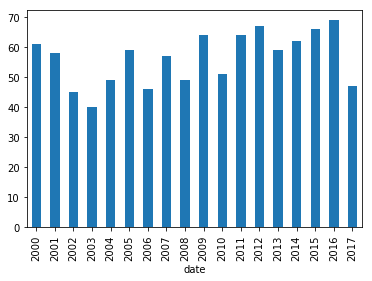

In [73]:
%matplotlib inline
df[df.court.str.contains('Appeal')].groupby(df.date.dt.year).size().plot(kind='bar')

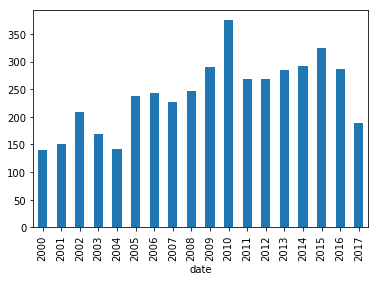

In [74]:
df[df.court.str.contains('High')].groupby(df.date.dt.year).size().plot(kind='bar')

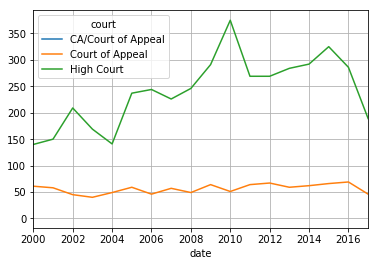

In [75]:
df[df.court.str.contains('Appeal|High')].groupby([df.court, df.date.dt.year]).size().unstack('court').plot(grid=True)

### Checking  the values in the court column

In [76]:
df.court.value_counts()

High Court                                  4342
Court of Appeal                             1012
Court of Three Judges                         14
Singapore International Commercial Court      12
CA/Court of Appeal                             1
Name: court, dtype: int64

There is one inconsistent value which shows 'CA/Court of Appeal' instead of the usual 'Court of Appeal'. This is corrected.

In [77]:
df.court = df.court.str.replace('CA/', '')
df.court.value_counts()

High Court                                  4342
Court of Appeal                             1013
Court of Three Judges                         14
Singapore International Commercial Court      12
Name: court, dtype: int64

### Summary statistics of the coram column 

We check the coram column to ensure that the data is clean. As there is a sizeable number of missing values in the author column, it may be useful to fill in these missing values from the coram values where possible.

In [78]:
df.coram.describe()

count                5381
unique                440
top       Choo Han Teck J
freq                  499
Name: coram, dtype: object

### Find out what is the delimiter used when there are multiple judges in the coram column

In [79]:
df[df.coram.str.contains('and')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14035,Standard Chartered Bank v Loh Chong Yong Thomas,[2010] SGCA 2,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 47 of 2009,2010-01-29,Court of Appeal,"Chan Sek Keong CJ, Andrew Phang Boon Leong JA ...","Patrick Ang, Chin Wei Lin, Jonathan Lee (Rajah...",Civil Procedure – Striking out;Choses in Actio...
14038,CLAAS Medical Centre Pte Ltd (formerly known a...,[2010] SGCA 3,Chao Hick Tin JA (delivering the judgment of t...,Civil Appeal No 35 of 2009,2010-02-01,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA a...",Aqbal Singh and Josephine Chong (Unilegal LLC)...,Contract – Privity of Contract;Contract – Rest...
14050,George Raymond Zage III and another v Ho Chi K...,[2010] SGCA 4,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 3 of 2009,2010-02-10,Court of Appeal,"Chan Sek Keong CJ, Andrew Phang Boon Leong JA ...","Harry Elias SC, Doris Chia, Shanti Jaganathan ...",Equity;Trusts
14051,Gobinathan Devathasan v Singapore Medical Council,[2010] SGHC 51,V K Rajah JA (delivering the judgment of the c...,Originating Summons No 1027 of 2009,2010-02-10,High Court,"Chan Sek Keong CJ, Andrew Phang Boon Leong JA ...",Myint Soe and Xu Daniel Atticus (Myintsoe & Se...,Professions – Medical Profession and Practice ...
14077,Over & Over Ltd v Bonvests Holdings Ltd and an...,[2010] SGCA 7,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 141 of 2008,2010-02-24,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA a...","Sundaresh Menon SC, Tammy Low Wan Jun and Paul...",Companies – Oppression – Minority shareholders


In [80]:
df[df.coram.str.contains(';')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14912,Rotor Mix Pte Ltd v Feng Ming Construction Pte...,[2012] SGHC 131,NaN,Suit No 478 of 2011,2012-06-25,High Court,Ranjit Singh (Francis Khoo & Lim) for the plai...,Contract – Breach,NaN
15838,Mohamad Fairuuz bin Saleh v Public Prosecutor,[2014] SGHC 264,Sundaresh Menon CJ:,Magistrate’s Appeal No 113 of 2014,2014-12-22,High Court,Sundaresh Menon CJ; Chao Hick Tin JA; See Kee ...,S K Kumar and Joseph Fernandez (S K Kumar Law ...,Criminal procedure and sentencing – Sentencing...
15871,Ong & Ong Pte Ltd v Fairview Developments Pte Ltd,[2015] SGCA 5,Chao Hick Tin JA (delivering the judgment of t...,Civil Appeal No 163 of 2013,2015-01-23,Court of Appeal,Chao Hick Tin JA; Andrew Phang Boon Leong JA a...,Mohan Pillay and Ang Wee Jian (MPillay) for th...,Civil Procedure – Offer to settle;Contract – F...
15878,Goik Soon Guan v Public Prosecutor,[2015] SGHC 31,Chao Hick Tin JA:,Magistrate’s Appeal No 209 of 2013,2015-01-30,High Court,Chao Hick Tin JA;,Zaminder Singh Gill (Hillborne Law LLC) for th...,Criminal procedure and sentencing – Sentencing
17911,BP Singapore Pte Ltd v Quek Chin Thean and others,[2011] 2 SLR 541; [2010] SGHC 358,Lai Siu Chiu J:,"Suit No 482 of 2010 ;(Summonses Nos 3570, 3572...",2010-12-10,High Court,Lai;Siu Chiu J,"Indranee Rajah SC, Daniel Tan, Rakesh Kirpalan...",Civil Procedure - Anton Piller orders - Compan...


In [81]:
df[df.coram.str.contains(',')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12482,Law Society of Singapore v Tay Soo Wan,[2005] SGHC 7,Yong Pung How CJ (delivering the judgment of t...,OS 987/2004,2005-01-07,High Court,"Chao Hick Tin JA, Tay Yong Kwang J, Yong Pung ...",Zaheer K Merchant (Madhavan Partnership) for a...,Legal Profession
12485,Shanmugam s/o Murugesu v Public Prosecutor,[2005] SGCA 1,Kan Ting Chiu J (delivering the judgment of th...,Cr App 10/2004,2005-01-14,Court of Appeal,"Chao Hick Tin JA, Kan Ting Chiu J, Yong Pung H...",Peter Fernando (Leo Fernando) and Amarick Gill...,Criminal Law
12486,Wee Soon Kim Anthony v UBS AG and Others,[2005] SGCA 3,Woo Bih Li J (delivering the judgment of the c...,"CA 68/2004, NM 108/2004",2005-01-17,Court of Appeal,"Belinda Ang Saw Ean J, Lai Kew Chai J, Woo Bih...","Appellant in person, Hri Kumar and Gary Low (D...",Civil Procedure;Legal Profession
12487,Ong Jane Rebecca v Lim Lie Hoa and Others,[2005] SGCA 4,Judith Prakash J:,CA 58/2004,2005-01-19,Court of Appeal,"Judith Prakash J, Lai Kew Chai J, Yong Pung Ho...",Andre Arul (Arul Chew and Partners) for appell...,Civil Procedure;Probate and Administration;Trusts
12496,Chwee Kin Keong and Others v Digilandmall.com ...,[2005] 1 SLR 502; [2005] SGCA 2,Chao Hick Tin JA (delivering the judgment of t...,CA 30/2004,2005-01-13,Court of Appeal,"Chao Hick Tin JA, Kan Ting Chiu J, Yong Pung H...",Malcolm Tan (Tan SL and Partners) for the appe...,Contract;Civil Procedure


It appears that there is no one consistent delimiter for all cases. The delimiter could be a comma, semicolon, or the word 'and'.

### Cleaning the data in the coram column

The coram values are first split using the delimiters: comma, semicolon, or the word 'and'. The results are then combined into a single dataframe for review.

In [82]:
judges = pd.DataFrame([judge for judge_list in df.coram.str.split(
    '\s*,\s*|\s*and\s*|\s*;\s*').tolist() for judge in judge_list])

If the split was done correctly, the judicial titles such as 'J', 'JA', or 'JC' should appear at the end of each judge name.

In [83]:
try: 
    judges[0].str.split().str[-1].value_counts()
except Exception as e:
    print (e)

list index out of range


However, when an attempt is made to split the values into 'name' and 'title' format (using default space), a 'list index out of range' error is raised when accessing the value at index [-1], which means there are empty strings in the series.

In [84]:
len(judges[judges[0]==''])

5

There are 5 instances of empty strings, which means there are delimiters in unexpected places (beginning or end of string, or next to one another).

In [85]:
df[df.coram.str.startswith(';', na=False) | df.coram.str.endswith(';', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15878,Goik Soon Guan v Public Prosecutor,[2015] SGHC 31,Chao Hick Tin JA:,Magistrate’s Appeal No 209 of 2013,2015-01-30,High Court,Chao Hick Tin JA;,Zaminder Singh Gill (Hillborne Law LLC) for th...,Criminal procedure and sentencing – Sentencing


There is one instance of semicolons incorrectly appearing at the beginning and/or end of the judge's name. This is fixed by stripping the semicolons.

In [86]:
df['coram']= df.coram.str.strip('; ')
df.loc[[15878]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15878,Goik Soon Guan v Public Prosecutor,[2015] SGHC 31,Chao Hick Tin JA:,Magistrate’s Appeal No 209 of 2013,2015-01-30,High Court,Chao Hick Tin JA,Zaminder Singh Gill (Hillborne Law LLC) for th...,Criminal procedure and sentencing – Sentencing


In [87]:
df[df.coram.str.contains(', and', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15319,Alwie Handoyo v Tjong Very Sumito and another ...,[2013] SGCA 44,V K Rajah JA (delivering the judgment of the c...,Civil Appeal Nos 82 and 83 of 2012 (Suit No 89...,2013-08-06,Court of Appeal,"Sundaresh Menon CJ, Chao Hick Tin JA, and V K ...",Sivakumar Vivekanandan Murugaiyan (Genesis Law...,Agency – Evidence of agency;Bailment;Civil pro...
15900,Mustafa Ahunbay v Public Prosecutor,[2015] SGCA 10,Chao Hick Tin JA (delivering the judgment of t...,Criminal Reference No 1 of 2014,2015-02-11,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA, ...","N Sreenivasan SC, Rajaram Muralli Raja and Cho...",Criminal Procedure and Sentencing – Disposal o...


There are two instances of a comma appearing just before the word 'and'. This is fixed by replacing them with a semicolon.

In [88]:
df.coram = df.coram.str.replace(', and', ';')
df.loc[[15319, 15900]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15319,Alwie Handoyo v Tjong Very Sumito and another ...,[2013] SGCA 44,V K Rajah JA (delivering the judgment of the c...,Civil Appeal Nos 82 and 83 of 2012 (Suit No 89...,2013-08-06,Court of Appeal,"Sundaresh Menon CJ, Chao Hick Tin JA; V K Raja...",Sivakumar Vivekanandan Murugaiyan (Genesis Law...,Agency – Evidence of agency;Bailment;Civil pro...
15900,Mustafa Ahunbay v Public Prosecutor,[2015] SGCA 10,Chao Hick Tin JA (delivering the judgment of t...,Criminal Reference No 1 of 2014,2015-02-11,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA; ...","N Sreenivasan SC, Rajaram Muralli Raja and Cho...",Criminal Procedure and Sentencing – Disposal o...


In [89]:
df[df.coram.str.contains('; and', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17917,Tan Kheng Chun Ray v Public Prosecutor,[2012] SGCA 10,Andrew Phang Boon Leong JA (delivering the gro...,Criminal Appeal No 3 of 2011,2012-02-03,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon Leong JA; ...",Subhas Anandan and Sunil Sudheesan (RHT Law LL...,Criminal Law
17925,Law Society of Singapore v Wan Hui Hong James,[2013] SGHC 85,V K Rajah JA (delivering the grounds of decisi...,Originating Summons No 952 of 2012,2013-04-22,Court of Three Judges,"Chao Hick Tin JA, Andrew Phang Boon Leong JA; ...",S H Almenoar (R Ramason & Almenoar) for the; a...,Legal Profession - Conflict of interest;Legal ...


There are two instances of a semicolon appearing just before the word 'and'. This is fixed by replacing them with a semicolon.

In [90]:
df.coram = df.coram.str.replace('; and', ';')

After fixing the incorrectly placed delimiters, the split is attempted again to extract the individual judge names and judicial titles.

In [91]:
judges = pd.DataFrame([judge for judge_list in df.coram.str.split(
    ',\s*|\s*and\s*|\s*;\s').tolist() for judge in judge_list])

In [92]:
judges[0].str.split().str[-1].value_counts()

J             3606
JA            2006
CJ            1010
JC             622
AR             179
SJ              58
was)            23
IJ              18
SAR             12
Yi-Ling          3
Teck             2
Elaine           2
Tung             1
Chua             1
Loh;J            1
Lionel           1
Boon             1
Peng             1
plaintiff        1
Ping             1
Abdullah         1
defendant.       1
Sern             1
Lee              1
Name: 0, dtype: int64

The split is successful for the majority of cases. However, there are 23 instances where the judge's name and title were not split correctly because of the additional words '(as he then was)' added to the judge's name. A number of other names were also split incorrectly due to commas appearing within the names.

In [93]:
df[df.coram.str.contains('was\)') | df.coram.str.contains('Yi-Ling,') | df.coram.str.contains('Sern,')].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14261,Ng Joo Soon (alias Nga Ju Soon) v Dovechem Hol...,[2010] SGHC 242,Philip Pillai J:,Suit No 59 of 2009 consolidated with Suit No 1...,2010-08-18,High Court,Philip Pillai JC (as he then was),"Adrian Tan, Blossom Hing Shan Shan and Sheryl ...",Companies
14582,Guy Neale and others (suing as a partnership) ...,[2011] SGHC 136,"Chew Yi-Ling, Elaine AR:",Suit No 955 of 2010 (Summons No 608 of 2011),2011-05-26,High Court,"Chew Yi-Ling, Elaine AR",Kristy Tan and Sylvia Tee (Allen & Gledhill LL...,Civil Procedure
14967,Ho See Jui (trading as Xuanhua Art Gallery) v ...,[2012] SGHCR 11,"AR Chew Yi-Ling, Elaine:",Suit 959 of 2009 (NA 26 of 2012),2012-08-08,High Court,"AR Chew Yi-Ling, Elaine","Kelvin Poon Kin Mun, Kue Tit Yin Melissa and C...",Damages – Assessment
14988,JFC Builders Pte Ltd v Lioncity Construction C...,[2012] SGHCR 12,"AR Chew Yi-Ling, Elaine:",Originating Summons 547 of 2012,2012-08-08,High Court,"Chew Yi-Ling, Elaine",Kishan Pillay (TSMP Law Corporation) for the p...,Building and Construction Law
15007,Hayate Investment Co Ltd v ManagementPlus (Sin...,[2012] SGHCR 3,Paul Chan AR:,Suit No 929 of 2011(Summons No 222 of 2012),2012-05-09,High Court,"Chan Wei Sern, Paul AR",Chia Swee Chye Kelvin (Samuel Seow Law Corpora...,Civil Procedure – setting aside of judgment;De...


This is fixed by removing the words '(as he then was)' and the commas from the affected names.

In [94]:
df.coram = df.coram.str.replace(' \(as he then was\)', '').str.replace('Yi-Ling,','Yi-Ling').str.replace('Sern,', 'Sern')

Some of the names and judicial titles were not separated by a space. This is fixed by replacing the name with the correct separating space.

In [95]:
df.coram = df.coram.str.replace('Loh;J', 'Loh J')

There is one instance where the words 'plaintiff' and 'defendant.' unexpectedly appear in the coram column.

In [96]:
df[df.coram.str.contains('plaintiff|defendant')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14912,Rotor Mix Pte Ltd v Feng Ming Construction Pte...,[2012] SGHC 131,NaN,Suit No 478 of 2011,2012-06-25,High Court,Ranjit Singh (Francis Khoo & Lim) for the plai...,Contract – Breach,NaN


It turns out that the values for the coram, counsel and catchwords columns were misaligned. This is fixed by shifting the values to their correct positions.

In [97]:
df.loc[[14912], ['coram', 'counsel', 'catchwords']] = df.loc[[14912], ['coram', 'counsel', 'catchwords']].shift(1, axis=1)
df.loc[[14912]]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14912,Rotor Mix Pte Ltd v Feng Ming Construction Pte...,[2012] SGHC 131,NaN,Suit No 478 of 2011,2012-06-25,High Court,NaN,Ranjit Singh (Francis Khoo & Lim) for the plai...,Contract – Breach


To fill in the missing values in the 'author' and 'coram' columns, the judge's name was obtained from http://commonlii.org/sg/cases/SGHC/2012/ 

In [98]:
df.loc[14912,['author','coram']] = 'Lai Siu Chiu J'

The handful of remaining cases that did not split correctly into 'name' and 'title' format are eyeballed to identify the errors or inconsistencies. We first check whether the judicial titles are missing from the coram values by checking the end-of-string values.

In [99]:
df[df.coram.str.contains('Teck$|Elaine$|Ping$|Lee$|Peng$|Chua$|Boon$|Tung$|Abdullah$|Lionel$')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14695,Out of the Box Pte Ltd v Wanin Industries Pte Ltd,[2011] SGHC 226,AR Leo Zhen Wei Lionel:,Suit No 317 of 2009 (Notice of Appointment for...,2011-10-11,High Court,AR Leo Zhen Wei Lionel,Tham Wei Chern and Sylvia Tee (Allen & Gledhil...,Contract
14967,Ho See Jui (trading as Xuanhua Art Gallery) v ...,[2012] SGHCR 11,"AR Chew Yi-Ling, Elaine:",Suit 959 of 2009 (NA 26 of 2012),2012-08-08,High Court,AR Chew Yi-Ling Elaine,"Kelvin Poon Kin Mun, Kue Tit Yin Melissa and C...",Damages – Assessment
14977,Shanghai Construction (Group) General Co. Sing...,[2012] SGHCR 10,AR Eunice Chua:,Suit No 146 of 2012 (Summons No 3323 of 2012),2012-07-27,High Court,AR Eunice Chua,Mr Patrick Ong (David Ong & Co) for the plaint...,Civil Procedure
14988,JFC Builders Pte Ltd v Lioncity Construction C...,[2012] SGHCR 12,"AR Chew Yi-Ling, Elaine:",Originating Summons 547 of 2012,2012-08-08,High Court,Chew Yi-Ling Elaine,Kishan Pillay (TSMP Law Corporation) for the p...,Building and Construction Law
15146,Dinesh Kishin Kikla (as Administrator of the E...,[2013] SGHCR 06,AR Chee Min Ping:,Suit No 76 of 2012 (Summons No 4327 and 4911 o...,2013-02-19,High Court,AR Chee Min Ping,"Hri Kumar, SC and Melissa Liew (instructed) an...",Civil Procedure
15199,See Fong Mun v Chan Yuen Lan,[2013] SGHC 99,Choo Han Teck J:,Suit No 298 of 2012,2013-05-06,High Court,Choo Han Teck,"Lim Seng Siew (instructed), Lai Swee Fung and ...",Trusts
15954,Ram Das V N P v SIA Engineering Co Ltd,[2015] SGHC 74,Hoo Sheau Peng:,District Court Appeal No 32 of 2014,2015-03-19,High Court,Hoo Sheau Peng,Perumal Athitham (Yeo Perumal Mohideen Law Cor...,Civil Procedure – Offer to settle
15955,ARV v ARW,[2015] SGHC 72,Aedit Abdullah:,Divorce Transfer No 6172 of 2011,2015-03-16,High Court,Aedit Abdullah,"Loh Wai Mooi, Ho Shiao Hong (Bih Li & Lee) for...",Family Law – Matrimonial Assets – Division;Fam...
17937,Lai Jenn Wuu v Public Prosecutor,[2013] SGHC 190,Choo Han Teck J:,Magistrate's Appeal No 12 of 2013,2013-09-27,High Court,Choo Han Teck,Foo Cheow Ming (Peter Ong & Raymond Tan) for t...,Criminal Law - Sentencing - Forgery


The coram values listed above are either missing the judicial title or have it placed before the name. This is fixed by placing the judicial titles after the names.

In [100]:
df.loc[14695, ['author', 'coram']] = 'Leo Zhen Wei Lionel AR'
df.loc[14967, ['author', 'coram']] = df.loc[14988, ['author', 'coram']] = 'Chew Yi-Ling Elaine AR'
df.loc[14977, ['author', 'coram']] = 'Eunice Chua AR'
df.loc[15146, ['author', 'coram']] = 'Chee Min Ping AR'
df.loc[15199, 'coram'] = df.loc[17937, 'coram'] = 'Choo Han Teck J'
df.loc[15954, ['author', 'coram']] = 'Hoo Sheau Peng JC'
df.loc[15955, ['author', 'coram']] = 'Aedit Abdullah JC'
df.loc[17969, ['author', 'coram']] = 'Amy Tung AR'
df.loc[18212, ['author', 'coram']] = 'James Elisha Lee AR'

It is noted that the occurrence of an incorrectly split 'Boon' did not turn up in this end-of-string check. We try checking for the other possibility of an incorrect split due to a misplaced semicolon after the word 'Boon'.

In [101]:
df[df.coram.str.contains('Boon;')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17919,Law Society of Singapore v Ang Chin Peng and a...,[2013] 1 SLR 946; [2012] SGHC 234,Chao Hick Tin JA (delivering the judgment of t...,Originating Summons No 74 of 2012,2012-11-26,High Court,"Chao Hick Tin JA, Andrew Phang Boon;Leong JA a...",Dinesh Singh Dhillon and Ramesh s/o Selvaraj;(...,Legal Profession - Remuneration - Advocate and...
17923,South East Enterprises (Singapore) Pte Ltd v H...,[2013] SGCA 25,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 74 of 2012,2013-03-15,Court of Appeal,"Sundaresh Menon CJ, Andrew Phang Boon; Leong J...",Cheong Yuen Hee and Cheong Aik Chye (A C Cheon...,CIVIL PROCEDURE - Judgments and orders;Sheriff...
17941,Oh Choon v Lee Siew Lin,[2014] 1 SLR 629; [2013] SGCA 60,Andrew Phang Boon Leong JA (delivering the gro...,Civil Appeal No 162 of 2012,2013-11-08,Court of Appeal,"Chao Hick Tin JA, Andrew Phang Boon;Leong JA a...",Aye Cheng Shone (A C Shone & Co) for the;appel...,Family Law - Maintenance - Wife - Proportion o...


We find the instances where there is a misplaced semicolon where there should have been a space instead (the semicolons here are likely to have been a side effect of preprocessor.py which replaces '\n' characters with ';' when parsing the html to ensure that catchwords are delimited correctly). The semicolons are replaced with a space. 

In [102]:
df.coram = df.coram.str.replace('Boon;\s*', 'Boon ')

 Finally for consistency, all comma and 'and' delimiters throughout the coram column are replaced with semicolons.

In [103]:
df.coram = df.coram.str.replace(',| and', ';')

It may be useful to write a function that gets the judge names since this code is repeated.

In [104]:
def get_judges(df):
    judges = pd.DataFrame([judge for judge_list in df.coram.str.split('; ').tolist() for judge in judge_list])
    judges.drop_duplicates(inplace=True)
    judges = judges[0].str.rsplit(' ', expand=True, n=1)
    judges.columns = ['name', 'title']
    return judges

After fixing the names and using a consistent delimiter, the split is attempted again to extract the judge names and titles.

In [105]:
judges = get_judges(df)
judges.title.value_counts()

AR     75
JC     37
J      36
JA     14
IJ     10
SJ      5
CJ      3
SAR     2
Name: title, dtype: int64

The judge names and judicial titles appear to be splitting correctly now. The next step is to verify that the names are correct and consistent.

In [106]:
judges[judges.name.str.match('^A|B')].sort_values(by='name')

,name,title
4401,Aedit Abdullah,JC
5729,Amarjeet Singh,JC
3305,Amy Seow Wai Peng,AR
4709,Amy Tung,AR
51,Andrew Ang,JC
260,Andrew Ang,J
5429,Andrew Ang,SJ
111,Andrew Phang Boon Leong,JC
407,Andrew Phang Boon Leong,J
463,Andrew Phang Boon Leong,JA


In [107]:
judges[judges.name.str.match('^C|D|E')].sort_values(by='name')

,name,title
4548,Chan Sek Keong,SJ
594,Chan Sek Keong,CJ
5712,Chan Seng Onn,JC
1130,Chan Seng Onn,J
2273,Chan Tai-Hui Jason,AR
2459,Chan Wei Sern Paul,AR
4292,ChanSeng Onn,J
3,Chao Hick Tin,JA
4681,Chao;Hick Tin,JA
3643,Chee Min Ping,AR


In [108]:
judges[judges.name.str.match('^F|G|H|I|J')].sort_values(by='name')

,name,title
2868,Fong Mian Yi Seraphina,AR
4958,Foo Chee Hock,JC
5373,Foo Tuat Yien,JC
1769,Francis Ng Yong Kiat,AR
5724,G P Selvam,J
4901,George Wei,J
3856,George Wei,JC
4716,George;Wei,JC
4514,GeorgeWei,JC
5648,Goh Joon Seng,J


In [109]:
judges[judges.name.str.match('^K|L|M|N')].sort_values(by='name')

,name,title
9,Kan Ting Chiu,J
4606,Kan Ting Chiu,SJ
7364,Kannan Ramesh,J
4996,Kannan Ramesh,JC
2169,Kathryn Thong,AR
3555,Keith Han,AR
3564,Kevin Tan Eu Shan,AR
5531,L P Thean,JA
12,Lai Kew Chai,J
4611,Lai Siu Chiu,SJ


In [110]:
judges[judges.name.str.match('^P|Q|R|S')].sort_values(by='name')

,name,title
7142,Pang Khang Chau,JC
5344,Patricia Bergin,IJ
4770,Paul Quan,AR
852,Paul Tan,AR
2145,Peh Aik Hin,AR
1969,Philip Pillai,JC
2375,Philip Pillai,J
1958,Quentin Loh,JC
2340,Quentin Loh,J
3832,Quentin Loh Sze-On,J


In [111]:
judges[judges.name.str.match('^T|U|V|W|X|Y|Z')].sort_values(by='name')

,name,title
0,Tan Lee Meng,J
5155,Tan Lee Meng,SJ
3921,Tan Siong Thye,JC
4176,Tan Siong Thye,J
4297,Tan SiongThye,J
2453,Tan Sze Yao,AR
3463,Tan Teck Ping Karen,AR
5733,Tay Yong Kwang,JC
4,Tay Yong Kwang,J
5400,Tay Yong Kwang,JA


Errors (missing spaces) are fixed and some names are changed for consistency (e.g. 'Quentin Loh Sze-On' to 'Quentin Loh')

In [112]:
df.coram = df.coram.str.replace('BoonLeong', 'Boon Leong').str.replace('AndrewAng', 'Andrew Ang')
df.coram = df.coram.str.replace('AndrewPhang', 'Andrew Phang').str.replace('ChanSeng', 'Chan Seng').str.replace('Chao;', 'Chao ')
df.coram = df.coram.str.replace('George;?Wei', 'George Wei').str.replace('Judith;', 'Judith ').str.replace('Lai;', 'Lai ')
df.coram = df.coram.str.replace('LeeKim', 'Lee Kim').str.replace('LeeSeiu', 'Lee Seiu')
df.coram = df.coram.str.replace('Lionel;?Yee', 'Lionel Yee').str.replace(' Sze-On', '').str.replace(' Li Shiong', '')
df.coram = df.coram.str.replace('CJAndrew', 'CJ; Andrew').str.replace('SiongThye', 'Siong Thye')
df.coram = df.coram.str.replace('TayYong', 'Tay Yong').str.replace('V;?K', 'V K').str.replace('WooBih', 'Woo Bih')

In [113]:
judges = get_judges(df)
judges.name.value_counts()

Tay Yong Kwang             3
Andrew Ang                 3
V K Rajah                  3
Sundaresh Menon            3
Steven Chong               3
Andrew Phang Boon Leong    3
Woo Bih Li                 2
See Kee Oon                2
Chan Sek Keong             2
Lai Siu Chiu               2
Philip Pillai              2
Belinda Ang Saw Ean        2
Kannan Ramesh              2
George Wei                 2
Judith Prakash             2
Tan Lee Meng               2
Lee Seiu Kin               2
Yeong Zee Kin              2
Choo Han Teck              2
Kan Ting Chiu              2
Tan Siong Thye             2
Chan Seng Onn              2
Vinodh Coomaraswamy        2
Chua Lee Ming              2
Quentin Loh                2
Chong Chin Chin            1
Yasuhei Taniguchi          1
Sim Khadijah               1
Daphne Hong Fan Sin        1
Darius Chan                1
                          ..
Denise Wong                1
Foo Chee Hock              1
Teo Guan Kee               1
Lionel Yee    

The coram lists will need to be sorted so that we can compare them across different cases. 

In [114]:
df.coram = df.coram.str.split('; ').apply(lambda x: "; ".join(sorted(x)))

In [115]:
df.coram.value_counts().head(20)

Choo Han Teck J                                                     501
Judith Prakash J                                                    310
Woo Bih Li J                                                        248
Lai Siu Chiu J                                                      241
Tay Yong Kwang J                                                    236
Yong Pung How CJ                                                    231
Belinda Ang Saw Ean J                                               197
Lee Seiu Kin J                                                      180
Kan Ting Chiu J                                                     164
Andrew Phang Boon Leong JA; Chan Sek Keong CJ; V K Rajah JA         158
Tan Lee Meng J                                                      151
Chan Seng Onn J                                                     144
Andrew Ang J                                                        136
Andrew Phang Boon Leong JA; Chao Hick Tin JA; V K Rajah JA      

Check whether there is any CA judgment with only one judge value in the coram column, as we expect to see more than one judge.

In [116]:
df[(~df.coram.str.contains(';')) & (df.court=='Court of Appeal')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
21949,Tan Chin Seng and Others v Raffles Town Club P...,[2002] SGCA 35,NaN,CA 51/2002,2002-07-16,Court of Appeal,Chao Hick Tin JA,Tong Beng Teck Roland and Wang Shao-Ing ( Wong...,Civil Procedure - Discovery of Documents - Cri...
22411,Projector SA v Marubeni International Petroleu...,[2004] SGCA 34,Woo Bih Li J:,"CA 42/2004, NM 51/2004",2004-08-11,Court of Appeal,Woo Bih Li J,Lawrence Teh and Sean La'Brooy (Rodyk and Davi...,Civil Procedure - Appeals - Notice - Applicati...
22413,Sumitomo Corp Capital Asia Pte Ltd v Salim Ant...,[2004] SGCA 38,Andrew Ang JC:,"CA 50/2004 (NM 66/2004, 75/2004), CA 51/2004 (...",2004-09-03,Court of Appeal,Andrew Ang JC,"Lok Vi Ming, Ajinderpal Singh and Loh Kia Meng...",Courts and Jurisdiction - Court of Appeal - Si...


Checking the html files reveals that:
1. There is another judge's name at the bottom of the judgment in 21949 so the error is fixed by adding the name to the coram. TThe author is also indicated in the judgment.
2. The cases 22411 and 22413 were dealt with by a single judge Court of Appeal under s 36(1) of the Supreme Court of Judicature Act (Cap 322, 1999 Rev Ed) so the coram values are correct.

In [117]:
df.loc[21949, 'author'] = 'Chao Hick Tin JA'
df.loc[21949, 'coram'] = 'Chao Hick Tin JA; Tan Lee Meng J'

Court of Appeal cases with 2 judges in the coram

In [118]:
df[~(df.coram.str.contains(';.+;')) & (df.court=='Court of Appeal')]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12505,AP Moller-Maersk A/S (trading as Maersk Sealan...,[2005] 1 SLR 603; [2005] SGCA 6,Chao Hick Tin JA (delivering the judgment of t...,CA 105/2004,2005-01-26,Court of Appeal,Chao Hick Tin JA; Lai Kew Chai J,Govintharasah s/o Ramanathan and Stephanie Won...,Civil Procedure
12528,Projector SA v Marubeni International Petroleu...,[2005] 2 SLR 144; [2005] SGCA 5,Chao Hick Tin JA (delivering the judgment of t...,CA 42/2004,2005-01-25,Court of Appeal,Chao Hick Tin JA; Choo Han Teck J,Lawrence Teh and Sean La'Brooy (Rodyk and Davi...,Injunctions
12573,Multiplex Constructions Pty Ltd v Sintal Enter...,[2005] 2 SLR 530; [2005] SGCA 10,Judith Prakash J (delivering the judgment of t...,CA 61/2004,2005-03-03,Court of Appeal,Chao Hick Tin JA; Judith Prakash J,Vinodh S Coomaraswamy and Pradeep Pillai (Shoo...,Arbitration
12603,Chin Bay Ching v Merchant Ventures Pte Ltd,[2005] 3 SLR 142; [2005] SGCA 29,Chao Hick Tin JA (delivering the judgment of t...,CA 86/2004,2005-05-17,Court of Appeal,Chao Hick Tin JA; Lai Kew Chai J,Ang Cheng Hock and Eugene Thuraisingam (Allen ...,Tort
12622,Changhe International Investments Pte Ltd (for...,[2005] 3 SLR 344; [2005] SGCA 30,Judith Prakash J (delivering the judgment of t...,CA 119/2004,2005-05-31,Court of Appeal,Chao Hick Tin JA; Judith Prakash J,Leslie Yeo Choon Hsien (Leslie Yeo and Associa...,Civil Procedure
12641,Beckkett Pte Ltd v Deutsche Bank AG,[2005] 3 SLR 555; [2005] SGCA 34,Chao Hick Tin JA (delivering the judgment of t...,CA 34/2005,2005-07-12,Court of Appeal,Chao Hick Tin JA; Tay Yong Kwang J,"Steven Chong SC, Ronald Choo and Sim Kwan Kiat...",Credit and Security;Civil Procedure
12652,"The ""Rainbow Joy""",[2005] 3 SLR 719; [2005] SGCA 36,Chao Hick Tin JA (delivering the judgment of t...,CA 116/2004,2005-07-20,Court of Appeal,Chao Hick Tin JA; V K Rajah J,Richard Kuek Chong Yeow and R Govintharasah (G...,Civil Procedure
12730,UCO Bank v Golden Shore Transportation Pte Ltd,[2006] 1 SLR 1; [2005] SGCA 42,Chao Hick Tin JA (delivering the judgment of t...,CA 8/2005,2005-09-14,Court of Appeal,Chao Hick Tin JA; Judith Prakash J,"Kenneth Tan SC (Kenneth Tan Partnership), Bazu...",Admiralty and Shipping
12806,Asian Corporate Services (SEA) Pte Ltd v Eastw...,[2006] 1 SLR 901; [2006] SGCA 1,Chao Hick Tin JA (delivering the judgment of t...,CA 27/2005,2006-01-16,Court of Appeal,Andrew Ang J; Chao Hick Tin JA,"Andy Leck, Dinesh Dhillon and Rachel Chong (Wo...",Civil Procedure


### Filling in the missing values in the author column using the coram values

Check how many CA and HC judgments have a missing value in the author column.

In [119]:
df[df.author.isnull()].court.value_counts()

High Court         679
Court of Appeal    207
Name: court, dtype: int64

It is possible to fill in the missing values in the 'author' column using the 'coram' values, particularly for cases where there is only one judge in the coram.

In [120]:
df[df.author.isnull() & (~df.coram.str.contains(';'))].head()

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
12515,City Hardware Pte Ltd v Kenrich Electronics Pt...,[2005] 1 SLR 733; [2005] SGHC 24,NaN,Suit 1108/2003,2005-01-31,High Court,V K Rajah J,"Peter Gabriel, Ismail bin Atan and Calista Pet...",Words and Phrases;Credit and Security;Personal...
12617,OTO Bodycare Pte Ltd v Hiew Keat Foong,[2005] SGHC 133,NaN,Suit 104/2004,2005-07-27,High Court,Tay Yong Kwang J,Wong Siew Hong (Infinitus Law Corporation) and...,Trade Marks and Trade Names;Civil Procedure
12683,Hwa Lai Heng Ricky v Public Prosecutor,[2005] SGHC 195,NaN,MA 97/2005,2005-10-14,High Court,Yong Pung How CJ,T U Naidu and K R Manickavasagam (T U Naidu an...,Criminal Procedure and Sentencing;Criminal Law
12694,Govindasamy Supramaniam v Bailey Foreign Holdi...,[2005] SGHC 199,NaN,"Suit 696/2005, SIC 5086/2005, 5137/2005",2005-10-20,High Court,Choo Han Teck J,Lee Eng Beng and Mark Cheng Wai Yuen (Rajah an...,Civil Procedure
12846,EB v EC (divorce: maintenance of stepchildren),[2006] 2 SLR 475; [2006] SGHC 44,NaN,D 603972/2003,2006-03-15,High Court,Woo Bih Li J,Christopher Yap (Christopher Yap & Co) for the...,Family Law


Copy values from coram column into author column if there is only one judge in the coram (that judge must have been the author).

In [121]:
df.loc[df.author.isnull() & (~df.coram.str.contains(';')),'author'] = df.loc[df.author.isnull() & (~df.coram.str.contains(';')),'coram'].values

In [122]:
df[df.author.isnull()].court.value_counts()

Court of Appeal    207
High Court          11
Name: court, dtype: int64

This reduced the number of missing values in High Court judgments from 679 to 11.

In [123]:
df[df.author.isnull()].coram.value_counts()

Chao Hick Tin JA; L P Thean JA; Yong Pung How CJ                      92
Chao Hick Tin JA; Tan Lee Meng J; Yong Pung How CJ                    33
Chao Hick Tin JA; Judith Prakash J; Yong Pung How CJ                  18
Chao Hick Tin JA; L P Thean JA                                        16
Chao Hick Tin JA; Tan Lee Meng J                                      14
Chao Hick Tin JA; L P Thean JA; Lai Kew Chai J                         9
Chao Hick Tin JA; L P Thean JA; Tan Lee Meng J                         9
Chao Hick Tin JA; Lai Kew Chai J; Yong Pung How CJ                     3
Chao Hick Tin JA; Judith Prakash J                                     3
Chao Hick Tin JA; MPH Rubin J; Tan Lee Meng J                          2
Chao Hick Tin JA; Judith Prakash J; Tan Lee Meng J                     2
Chao Hick Tin JA; L P Thean JA; MPH Rubin J                            1
Andrew Phang Boon Leong JA; Belinda Ang Saw Ean J; Choo Han Teck J     1
Chao Hick Tin JA; Lai Siu Chiu J; Tan Lee Meng J   

If there are multiple judges in the coram then one of them must be the author.

In [124]:
possible_authors = df[df.author.isnull()].coram.str.split('; ')
possible_authors.head()

index
13088    [Andrew Phang Boon Leong JA, Belinda Ang Saw E...
13505    [Andrew Ang J, Andrew Phang Boon Leong JA, Cha...
13540    [Andrew Phang Boon Leong JA, Chan Sek Keong CJ...
15032    [Andrew Phang Boon Leong JA, Chao Hick Tin JA,...
15284    [Sundaresh Menon CJ, Tan Lee Meng J, V K Rajah...
Name: coram, dtype: object

Look in the source html files for words "delivered by" to find which of the possible authors delivered the judgment.

In [125]:
import bs4
import re

p_tags = bs4.SoupStrainer('p')

for index, row in possible_authors.iteritems():
    soup = bs4.BeautifulSoup(open('html/' + str(index) + '.html', 'r', encoding='utf-8').read(), 'lxml', parse_only=p_tags)
    texts = soup(string=re.compile('\xa0'))
    for t in texts:
        text = t.replace('\xa0', ' ')
        t.replace_with(text)
    for judge in row:     
        if soup.find(string=re.compile("Delivered by\s+" + judge + "|" + judge + "\s+\(delivering the\s+")):
            df.loc[index, 'author'] = judge
        elif soup.find(string=re.compile("Delivered by")):
            tag = soup.find(string=re.compile("Delivered by"))
            if judge in (tag.next_element.string , tag.next_element.next_element.string):            
                df.loc[index, 'author'] = judge

Check how many remaining judgments have a missing value in the author column.

In [126]:
df[df.author.isnull()].court.value_counts()

Court of Appeal    161
High Court          11
Name: court, dtype: int64

The number of missing values in Court of Appeal judgments has reduced from 207 to 161.

Check how many judgments with a missing value in the author column were delivered after 2004.

In [127]:
df[df.author.isnull() & (pd.to_datetime(df.date).dt.year > 2004)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
13540,Public Prosecutor v UI,[2008] 4 SLR 500; [2008] SGCA 35,NaN,Cr App 10/2007,2008-08-05,Court of Appeal,Andrew Phang Boon Leong JA; Chan Sek Keong CJ;...,Daniel Koh and Charlene Tay (Attorney-General'...,Criminal Procedure and Sentencing;Courts and J...
15284,Mitora Pte Ltd v Agritrade International (Pte)...,[2013] SGCA 38,NaN,Civil Appeal Nos 85 and 86 of 2012,2013-07-03,Court of Appeal,Sundaresh Menon CJ; Tan Lee Meng J; V K Rajah JA,Peter Madhavan and Walter Ferix Justine (Josep...,Civil Procedure


Look up the missing values at http://commonlii.org which has a database of SG judgments since 2005

In [128]:
df.loc[13540, 'author'] = 'Chan Sek Keong CJ'
df.loc[15284, 'author'] = 'V K Rajah JA'

In [129]:
df[df.author.isnull()].court.value_counts()

Court of Appeal    159
High Court          11
Name: court, dtype: int64

### Filling in the missing values in catchwords column 

In [130]:
len(df[df.catchwords.isnull()])

103

In [131]:
cases = df[df.catchwords.isnull() & (df.date.dt.year > 2012)]
cases

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15336,Strategic Worldwide Assets Ltd v Sandz Solutio...,[2013] SGHC 162,Judith Prakash J:,Suit No 506 of 2009,2013-08-26,High Court,Judith Prakash J,Devinder Rai (ACIES Law Corporation) for the p...,NaN
15337,DHL Global Forwarding (Malaysia) Sdn Bhd v Mac...,[2013] SGHC 170,Choo Han Teck J:,Originating Summons No 351 of 2013 (Registrar’...,2013-09-09,High Court,Choo Han Teck J,"Ian Lim Wei Loong, Freddie Lim ShaoChun and Jo...",NaN
15415,Yan Jun v Attorney-General,[2013] SGHC 245,Woo Bih Li J:,Suit No 257 of 2013 (Registrar’s Appeal No 227...,2013-11-14,High Court,Woo Bih Li J,Yan Jun (plaintiff/appellant in person); Khoo ...,NaN
15606,Manharlal Trikamdas Mody and another v Sumikin...,[2014] SGHC 123,George Wei JC:,Originating Summons No 601 of 2013 (Summons No...,2014-06-30,High Court,George Wei JC,Andrew Ang / Andrea Tan (PK Wong & Associates)...,NaN
15607,Cheong Chun Yin v Attorney-General,[2014] SGHC 124,Tay Yong Kwang J:,Originating Summons No 25 of 2014,2014-06-27,High Court,Tay Yong Kwang J,M Ravi (L F Violet Netto) for the applicant; F...,NaN
15815,APC v APD,[2014] SGHC 260,Woo Bih Li J:,Divorce Transfer No 2507 of 2009 (Summons Nos ...,2014-12-04,High Court,Woo Bih Li J,Lim Poh Choo (Alan Shankar & Lim LLC) for the ...,NaN
15948,Pittis Stavros v PublicProsecutor,[2015] SGHC 67,See Kee Oon JC:,Magistrate’s Appeal No 82 of 2014,2015-03-13,High Court,See Kee Oon JC,"Shashi Nathan, Tania Chin and Jeremy Pereira(K...",NaN
18028,Toh Buan Eileen v Ho Kiang Fah,[2015] SGHC 12,Judith Prakash J:,Divorce Transfer No 3914 of 2006 and Summons N...,2015-01-19,High Court,Judith Prakash J,Yap Teong Liang (T L Yap & Associates) for the...,NaN
18060,Sim Chay Koon and others v NTUC Income Insuran...,[2015] SGCA 46,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 18 of 2015,2015-08-20,Court of Appeal,Andrew Phang Boon Leong JA; Steven Chong J; Su...,"Choo Zheng Xi, Peter Cuthbert Low, Raj Mannar ...",NaN


In [132]:
df.loc[15337, 'catchwords'] = 'Civil Procedure — Foreign Judgments — Reciprocal Enforcement of Commonwealth Judgments Act'
df.loc[15415, 'catchwords'] = 'Civil Procedure — Striking Out'
df.loc[15606, 'catchwords'] = ('Civil Procedure — Jurisdiction;Civil Procedure — Service;Choses in Action — Assignment;'
                               'Conflict of Laws — Natural Forum;Conflict of Laws — Jurisdiction;Insolvency Law — Bankruptcy;'
                               'Res Judicata— Issue Estoppel')
df.loc[15607, 'catchwords'] = 'Administrative Law— Judicial Review'
df.loc[15815, 'catchwords'] = 'Family Law— Custody— Care and Control'
df.loc[15948, 'catchwords'] = 'Criminal law— Offences — Property— Criminal breach of trust'
df.loc[18028, 'catchwords'] = 'Family Law— Matrimonial Assets'
df.loc[18060, 'catchwords'] = 'Arbitration — Arbitrability and public policy;Arbitration — Arbitral tribunal — Competence'
df.loc[18134, 'catchwords'] = 'Injunctions — Interlocutory injunctions'
df.loc[18542, 'catchwords'] = ('Criminal Procedure and Sentencing— Sentencing— Rape;Criminal Procedure and Sentencing— '
                               'Sentencing— Aggravated outrage of modesty;Criminal Procedure and Sentencing— Sentencing— '
                               'Criminal intimidation')
df.loc[18546, 'catchwords'] = 'Unincorporated associations and trade unions — Societies'
df.loc[22600, 'catchwords'] = 'Employment Law — Pay — Recovery'

In [133]:
len(df[df.catchwords.isnull()])

91

In [134]:
df.catchwords.describe()

count                5290
unique               3288
top       Civil Procedure
freq                  236
Name: catchwords, dtype: object

In [135]:
df.catchwords.head(10)

index
12479                                                  NaN
12480                                          Restitution
12481                                             Contract
12482                                     Legal Profession
12483                                             Contract
12484                               Civil Procedure;Trusts
12485                                         Criminal Law
12486                     Civil Procedure;Legal Profession
12487    Civil Procedure;Probate and Administration;Trusts
12488                                      Civil Procedure
Name: catchwords, dtype: object

In [136]:
df.catchwords.tail(10)

index
22917    Arbitration – Stay of court proceedings;Arbitr...
22918            Civil Procedure – Trusts – Business Trust
22919                 Civil Procedure – Damages – Interest
22920    Abuse of process;Contract – Variation – Oral a...
22921            Arbitration – Enforcement – Foreign award
22922    Arbitration – Award – Recourse against award –...
22923    Damages – Rules in awarding – Ascertainment di...
22925    Contract – Misrepresentation Act;Contract – Br...
22926    Contract – Formalities;Contract – Illegality a...
22927    Civil Procedure – Judgments and orders – Enfor...
Name: catchwords, dtype: object

In [137]:
df.catchwords = df.catchwords.str.lower().str.replace('\s*[—–-]+\s*', '-').str.replace('\s+', '_')

In [138]:
df.catchwords.tail(10)

index
22917    arbitration-stay_of_court_proceedings;arbitrat...
22918                civil_procedure-trusts-business_trust
22919                     civil_procedure-damages-interest
22920    abuse_of_process;contract-variation-oral_agree...
22921                arbitration-enforcement-foreign_award
22922    arbitration-award-recourse_against_award-setti...
22923    damages-rules_in_awarding-ascertainment_diffic...
22925    contract-misrepresentation_act;contract-breach...
22926    contract-formalities;contract-illegality_and_p...
22927     civil_procedure-judgments_and_orders-enforcement
Name: catchwords, dtype: object

In [139]:
df.catchwords.str.split(';', expand=True).head(10)

,0,1,2,3,4,5,6,7,8,9,10
index,,,,,,,,,,,
12479,NaN,None,None,None,None,None,None,None,None,None,None
12480,restitution,None,None,None,None,None,None,None,None,None,None
12481,contract,None,None,None,None,None,None,None,None,None,None
12482,legal_profession,None,None,None,None,None,None,None,None,None,None
12483,contract,None,None,None,None,None,None,None,None,None,None
12484,civil_procedure,trusts,None,None,None,None,None,None,None,None,None
12485,criminal_law,None,None,None,None,None,None,None,None,None,None
12486,civil_procedure,legal_profession,None,None,None,None,None,None,None,None,None
12487,civil_procedure,probate_and_administration,trusts,None,None,None,None,None,None,None,None


In [140]:
import numpy as np

In [141]:
def get_L1_catchwords(df):
    ds = df.catchwords.str.split(';').str[0].str.split('-').str[0].fillna('')
    for i in range(1, 11):
        ds = ds + ';' + df.catchwords.str.split(';').str[i].str.split('-').str[0].fillna('')
    return ds.str.split(';').apply(lambda x: ";".join(sorted(set(filter(None, x))))).replace('', np.nan)

In [142]:
def get_split_counts(ds):
    return pd.Series(
        [word for word_list in ds.fillna('').str.split(';').tolist() for word in word_list]).replace('', np.nan).value_counts()

In [143]:
L1_catchwords = get_L1_catchwords(df)
L1_catchwords.tail(10)

index
22917                               arbitration
22918                           civil_procedure
22919                           civil_procedure
22920    abuse_of_process;contract;res_judicata
22921                               arbitration
22922             arbitration;international_law
22923                                   damages
22925                                  contract
22926                             contract;land
22927                           civil_procedure
Name: catchwords, dtype: object

In [144]:
L1_counts = get_split_counts(get_L1_catchwords(df)).sort_index()
len(L1_counts)

169

In [145]:
L1_counts[:20]

_recourse_against_award                                                                                                                       1
abuse_of_process                                                                                                                              6
administrative_law                                                                                                                          106
administrative_law_â€“_judicial_review_â€“_application_for_leave_to_commence_judicial_review_proceedings                                      1
administrative_law_â€“_judicial_review_â€“_illegality                                                                                         1
administrative_law_â€“_natural_justice_â€“_disclosure_of_evidence                                                                             1
adminstrative_law                                                                                                                       

In [146]:
df[df.catchwords.str.contains('_recourse_against_award', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14873,Lim Chin San Contractors Pte Ltd v L W Infrast...,[2012] SGHC 75,Lai Siu Chiu J:,Originating Summons No. 988/2011,2012-04-10,High Court,Lai Siu Chiu J,Kelvin Chia Swee Chye (Samuel Seow Law Corpora...,arbitration-award-additional_award;_recourse_a...
18221,AYH v AYI and another,[2015] SGHC 300,Judith Prakash J:,HC/Originating Summons No 349 of 2015,2015-11-23,High Court,Judith Prakash J,"Francis Xavier SC, Alina Chia, Derek On and Te...",arbitration_â€“_award_â€“_recourse_against_awa...
18223,AUF v AUG and other matters,[2015] SGHC 305,Belinda Ang Saw Ean J:,"Originating Summons No 790 of 2014, Originatin...",2015-11-26,High Court,Belinda Ang Saw Ean J,"Alvin Yeo SC, Ian De Vaz, Nikki Ngiam, Wang Ye...",arbitration_â€“_award_â€“_recourse_against_awa...
18280,AKN and another v ALC and others and other app...,[2015] SGCA 63,Sundaresh Menon CJ (delivering the judgment of...,"Civil Appeals Nos [P], [Q] and [R]",2015-11-27,Court of Appeal,Andrew Phang Boon Leong JA; Steven Chong J; Su...,"Andre Yeap Poh Leong SC, Adrian Wong Soon Peng...",arbitration_â€“_award_â€“_recourse_against_awa...


In [147]:
df.loc[14873, 'catchwords'] = 'arbitration-award-additional_award;arbitration-award-recourse_against_award'

In [148]:
df[df.catchwords.str.contains('admiralty', na=False) & (~df.catchwords.str.contains('admiralty_', na=False))]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14774,The “Reecon Wolf”,[2012] SGHC 22,Belinda Ang Saw Ean J:,Admiralty in Rem No. 157 of 2010 (Registrar’s ...,2012-01-31,High Court,Belinda Ang Saw Ean J,S Mohan and Bernard Yee (Incisive Law LLC) for...,admiralty;conflict_of_laws-forum_non_conveniens


In [149]:
df.loc[14774, 'catchwords'] = 'admiralty_and_shipping;conflict_of_laws-forum_non_conveniens'

In [150]:
df[df.catchwords.str.contains(';bail$', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14897,Christanto Radius v Public Prosecutor,[2012] SGHC 114,Choo Han Teck J:,Criminal Motion No 31 of 2012,2012-05-24,High Court,Choo Han Teck J,"Quek Mong Hua and Julian Tay (Lee & Lee), and ...",criminal_procedure_and_sentencing-extradition;...


In [151]:
df.loc[14897, 'catchwords'] = 'criminal_procedure_and_sentencing-extradition-bail'

In [152]:
df.catchwords = df.catchwords.str.replace('adminstrative', 'administrative').str.replace('_âˆ’', '-').str.replace('_â€“_', '-')

In [153]:
L1_counts[21:40]

betting,_gaming_and_lotteries                                                                      5
bills_of_exchange_and_other_negotiable_instruments                                                11
building_and_construction_contracts                                                                1
building_and_construction_contracts,_contractors’_duties                                           1
building_and_construction_industry_security_of_payment_act                                         1
building_and_construction_law                                                                    105
building_and_construction_law_â€“_statutes_and_regulations                                         1
carriage_of_goods_by_air_and_land                                                                  6
caveats                                                                                            1
charities                                                                                  

In [154]:
df[df.catchwords.str.contains('^caveats', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14773,Tan Huat Soon v Lee Mee Leng,[2012] SGHC 21,Tay Yong Kwang J:,OS 831 of 2011,2012-01-31,High Court,Tay Yong Kwang J,Molly Lim SC and Sunanda Koh (Wong Tan & Molly...,caveats;equity


In [155]:
df.loc[14773, 'catchwords'] = 'land-caveats;equity'

In [156]:
df.catchwords = df.catchwords.str.replace('construction_contracts,_contractors’_duties', 'construction_law-contractors’_duties')
df.catchwords = df.catchwords.str.replace('building_and_construction_contracts', 'building_and_construction_law')
df.catchwords = df.catchwords.str.replace('industry_security_of_payment_act', 'law-security_of_payment_act')
df.catchwords = df.catchwords.str.replace('civil_procedue', 'civil_procedure')

In [157]:
df[df.catchwords.str.contains('civil_procedure_', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15952,Ng Chong Ping v Ng Chih-Ming Daren and others ...,[2015] SGHC 75,Choo Han Teck J:,Suit No 997 of 2013 (Registrar’s Appeal No 48 ...,2015-03-20,High Court,Choo Han Teck J,Chelliah Ravindran and Chain Xiao Wei Edmund (...,civil_procedure_­­-costs-principles
15988,Parakou Shipping Pte Ltd (in liquidation) v Li...,[2015] SGHC 96,Choo Han Teck J:,"Suit No 434 of 2014 (Summons Nos 6150, 6151, 6...",2015-04-13,High Court,Choo Han Teck J,"Kenneth Lim, Fay Fong Shi-Ting, Edward Kwok an...",civil_procedure_­­-mareva_injunctions
21533,Fortune Hong Kong Trading Ltd v Cosco Feoso (S...,[2000] SGCA 24,NaN,CA 180/1999,2000-05-08,Court of Appeal,Chao Hick Tin JA; L P Thean JA; Yong Pung How CJ,Winston Kwek and Raymond Ong (Colin Ng & Partn...,civil_procedure-service-service_of_foreign_pro...


In [158]:
df[df.catchwords.str.contains('\xad', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15952,Ng Chong Ping v Ng Chih-Ming Daren and others ...,[2015] SGHC 75,Choo Han Teck J:,Suit No 997 of 2013 (Registrar’s Appeal No 48 ...,2015-03-20,High Court,Choo Han Teck J,Chelliah Ravindran and Chain Xiao Wei Edmund (...,civil_procedure_­­-costs-principles
15988,Parakou Shipping Pte Ltd (in liquidation) v Li...,[2015] SGHC 96,Choo Han Teck J:,"Suit No 434 of 2014 (Summons Nos 6150, 6151, 6...",2015-04-13,High Court,Choo Han Teck J,"Kenneth Lim, Fay Fong Shi-Ting, Edward Kwok an...",civil_procedure_­­-mareva_injunctions
18384,Majlis Ugama Islam Singapura v Saeed Salman an...,[2016] SGHC 4,Aedit Abdullah JC:,Originating Summons No 662 of 2013,2016-01-11,High Court,Aedit Abdullah JC,"Edwin Tong SC, Aaron Lee, Fay Fong, Jasmine Th...",muslim_law_­­-charitable_trusts_­­-wakaf_creat...


In [159]:
df.catchwords = df.catchwords.str.replace('\xad', '').str.replace('_-', '-')

In [160]:
L1_counts[41:60]

commercial_transactions_â€“_sale_of_equipment_â€“_breach_of_contract                             1
companies                                                                                      313
companies_â€“_incorporation_of_companies_â€“_lifting_corporate_veil                              1
companies_â€“_oppression_â€“_minority_shareholders_â€“_bringing_statutory_derivative_action      1
company_law                                                                                      1
competition_law                                                                                  1
conflict_of_laws                                                                               126
conflict_of_laws_forum_non_conveniens                                                            1
conflict_of_laws_â€“_choice_of_jurisdiction_â€“_exclusive                                        1
conflict_of_laws_â€“_recognition_of_foreign_divorce_judgment                                     1
conflicts_

In [161]:
df.catchwords = df.catchwords.str.replace('company_law', 'companies').str.replace('conflicts_of_laws', 'conflict_of_laws')
df.catchwords = df.catchwords.str.replace('constitutional_interpretation', 'constitutional_law')
df.catchwords = df.catchwords.str.replace('conflict_of_laws_forum_non_conveniens', 'conflict_of_laws-forum_non_conveniens')

In [162]:
L1_counts[61:100]

contract_â€“_remedies_â€“_punitive_damages                                                                                      1
contract_â€“_remedies_â€“_specific_performance                                                                                  1
contracts                                                                                                                       1
copyright                                                                                                                      28
courts_and_jurisdiction                                                                                                       117
credit_&_security                                                                                                               1
credit_and_securities                                                                                                           1
credit_and_security                                                                       

In [163]:
df[df.catchwords.str.startswith('contracts', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14876,Compact Metal Industries Ltd v PPG Industries ...,[2012] SGHC 91,Lai Siu Chiu J:,Suit No 442 of 2005 (Registrar’s Appeal Nos 43...,2012-04-30,High Court,Lai Siu Chiu J,Michael Por (Michael Por Law Corporation) for ...,contracts-building_contracts


In [164]:
df.loc[14876, 'catchwords'] = 'contract-building_contracts'

In [165]:
df[df.catchwords.str.contains(';damage-', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14933,OMG Holdings Pte Ltd v Pos Ad Sdn Bhd,[2011] SGHC 246,Andrew Ang J:,Suit No 253 of 2009,2011-11-17,High Court,Andrew Ang J,"Pradeep G Pillai, Debby Lim and Lareina Tay (S...",contract-misrepresentation;contract-illegality...


In [166]:
df.loc[14933, 'catchwords']

'contract-misrepresentation;contract-illegality_and_public_policy-restraint_of_trade;tort-passing_off-goodwill-misrepresentation;damage-estoppel_by_convention'

In [167]:
df[df.catchwords.str.contains('criminal_procedure-', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14815,Kim Gwang Seok v Public Prosecutor,[2012] SGHC 51,Tay Yong Kwang J:,Criminal Motion No. 88 of 2011/H,2012-03-09,High Court,Tay Yong Kwang J,Tito Isaac and Jonathan Wong (Tito Isaac & Co ...,criminal_procedure-trials;evidence-witnesses
18003,Yusran bin Yusoff v Public Prosecutor,[2014] SGHC 74,Choo Han Teck J:,Magistrate's Appeal No 253 of 2013,2014-04-16,High Court,Choo Han Teck J,Appellant in-person; Suhas Malhotra (Attorney-...,criminal_law-statutory_offences-misuse_of_drug...
18107,Winston Lee Siew Boon v Public Prosecutor,[2015] SGHC 186,Chan Seng Onn J:,Magistrate's Appeal No 111 of 2014,2015-07-20,High Court,Chan Seng Onn J,"Davinder Singh SC, Pardeep Singh Khosa, Tham Y...",criminal_law-offences;criminal_procedure-sentence
18599,Public Prosecutor v Dewi Sukowati,[2016] SGHC 152,Foo Chee Hock JC:,Criminal Case No 65 of 2015,2016-09-16,High Court,Foo Chee Hock JC,Chee Min Ping and James Low (Attorney-General'...,criminal_procedure-sentencing;sentencing


In [168]:
df[df.catchwords.str.contains('criminal_procedure$', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15098,Mohammad Faizal bin Sabtu and another v Public...,[2013] SGCA 1,Chao Hick Tin JA (delivering the grounds of de...,Criminal Motions No 36 and 37 of 2012,2013-01-11,Court of Appeal,Andrew Phang Boon Leong JA; Chao Hick Tin JA; ...,S K Kumar (M/s S K Kumar Law Practice LLP) for...,criminal_procedure


In [169]:
df.loc[15098, 'catchwords'] = 'criminal_procedure_and_sentencing'

In [170]:
df[df.catchwords.str.contains('election_of_remedies', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14290,ABB Holdings Pte Ltd and others v Sher Hock Gu...,[2010] SGHC 267,Shaun Leong AR:,Suit No 798 of 2007 (Summons No 3343 of 2010),2010-09-06,High Court,Shaun Leong AR,"Tan Tee Jim S.C, Tay Wei loong Julian, Jiang K...",civil_procedure-amendment_of_pleadings;electio...


In [171]:
df.loc[14290, 'catchwords'] = 'civil_procedure-amendment_of_pleadings-election_of_remedies'

In [172]:
df[df.catchwords.str.contains(';estoppel-', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18364,Independent State of Papua New Guinea v PNG Su...,[2016] SGHC 19,Judith Prakash J:,HC/Originating Summons No 234 of 2015,2016-02-12,High Court,Judith Prakash J,"Koh Swee Yen, Yin Juon Qiang and Joel Quek (Wo...",civil_procedure-originating_processes;companie...


In [173]:
df.loc[18364, 'catchwords']

'civil_procedure-originating_processes;companies-memorandum_and_articles_of_association-effect;companies-accounts;companies-capacity-pre-incorporation_contracts;contract-collateral_contracts;contract-consideration;contract-ratification;estoppel-estoppel_by_representation'

In [174]:
df.loc[18364, 'catchwords'] = ('civil_procedure-originating_processes;companies-memorandum_and_articles_of_association-effect;'
                               'companies-accounts;companies-capacity-pre-incorporation_contracts;contract-collateral_contracts;'
                               'contract-consideration;contract-ratification;equity-estoppel-estoppel_by_representation')

In [175]:
df.catchwords = df.catchwords.str.replace('credit_&_security', 'credit_and_security')
df.catchwords = df.catchwords.str.replace('credit_and_securities', 'credit_and_security')
df.catchwords = df.catchwords.str.replace('criminal_procedure-', 'criminal_procedure_and_sentencing-')
df.catchwords = df.catchwords.str.replace(';damage-', ';damages-').str.replace('evidence_limitation', 'evidence-limitation')
df.catchwords = df.catchwords.str.replace('family_law,_insolvency_law', 'family_law;insolvency_law')

In [176]:
L1_counts[101:140]

immigration                                                    28
injunction                                                      1
injunctions                                                    36
inns_and_innkeepers                                             1
insolvency                                                      2
insolvency_law                                                148
insurance                                                      38
intellectual_property                                           1
interest_of_the_public                                          1
international_arbitration_act_(cap_143a)                        1
international_law                                              16
land                                                          207
land_law                                                        1
landlord_and_tenant                                            52
legal_profession                                              165
legal_prof

In [177]:
df[df.catchwords.str.contains('^injunction-', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18122,Jardine Lloyd Thompson Pte Ltd v Howden Insura...,[2015] SGHC 202,Choo Han Teck J:,Suit No 595 of 2015 (Summons No 2937 of 2015),2015-08-03,High Court,Choo Han Teck J,"Ang Cheng Hock SC, Vincent Leow, Tan Kai Liang...",injunction-interlocutory_injunction;injunction...


In [178]:
df.loc[18122, 'catchwords'] = 'injunctions-interlocutory_injunction;injunctions-springboard_injunction'

In [179]:
df[df.catchwords.str.contains('^insolvency-', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15287,Aliev Firoudin v Kon Yin Tong & another,[2013] SGHC 128,Judith Prakash J:,Originating Summons No 1015 of 2011,2013-07-09,High Court,Judith Prakash J,Deborah Evaline Barker SC and Ang Keng Ling (K...,insolvency-winding_up-liquidator
18481,Re Opti-Medix Ltd (in liquidation) and another...,[2016] SGHC 108,Aedit Abdullah JC:,Originating Summonses No 328 and 330 of 2016,2016-06-03,High Court,Aedit Abdullah JC,Stephanie Yeo Xiu Wen (WongPartnership LLP) fo...,insolvency-recognition_of_foreign_insolvency_p...


In [180]:
df.catchwords = df.catchwords.str.replace('^insolvency-', 'insolvency_law-')

In [181]:
df[df.catchwords.str.contains('^intellectual_property', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18545,Singsung Pte Ltd v LG 26 Electronics Pte Ltd (...,[2016] SGCA 33,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 135 of 2015,2016-05-23,Court of Appeal,Andrew Phang Boon Leong JA; Chao Hick Tin JA; ...,"Adrian Tan Gim Hai, Ong Pei Ching, Loh Jien Li...",intellectual_property-passing_off;intellectual...


In [182]:
df.loc[18545, 'catchwords']

'intellectual_property-passing_off;intellectual_property-copyright_infringement;intellectual_property-groundless_threats_of_legal_proceedings'

In [183]:
df[df.catchwords.str.contains('copyright_infringement', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18545,Singsung Pte Ltd v LG 26 Electronics Pte Ltd (...,[2016] SGCA 33,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 135 of 2015,2016-05-23,Court of Appeal,Andrew Phang Boon Leong JA; Chao Hick Tin JA; ...,"Adrian Tan Gim Hai, Ong Pei Ching, Loh Jien Li...",intellectual_property-passing_off;intellectual...
21770,Flamelite (S) Pte Ltd and Others v Lam Heng Ch...,[2001] SGCA 75,NaN,CA 600054/2001,2001-11-15,Court of Appeal,Chao Hick Tin JA; L P Thean JA; Yong Pung How CJ,Seah Sheng Lim Steven and Tan Teck San Kelvin ...,civil_procedure-parties-locus_standi-copyright...
21961,Bee Cheng Hiang Hup Chong Foodstuff Pte Ltd v ...,[2002] SGCA 47,Chao Hick Tin JA,CA No 43 of 2002,2002-11-01,Court of Appeal,Chao Hick Tin JA; Tan Lee Meng J,Wong Siew Hong (Infinitus Law Corporation) for...,copyright-infringement-whether_s_27(6)_trade_m...
22351,Public Prosecutor v Poh Kim Video Pte Ltd,[2003] SGHC 304,Yong Pung How CJ,MA 80/2003,2003-12-03,High Court,Yong Pung How CJ,Kirpal Singh (Kirpal and Associates) for appel...,criminal_procedure_and_sentencing-sentencing-w...


In [184]:
df[df.catchwords.str.contains('-groundless_threat', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14385,RecordTV Pte Ltd v MediaCorp TV Singapore Pte ...,[2010] SGCA 43,V K Rajah JA (delivering the judgment of the c...,Civil Appeal No 6 of 2010,2010-12-01,Court of Appeal,Andrew Phang Boon Leong JA; Chan Sek Keong CJ;...,"Alban Kang Choon Hwee, Koh Chia Ling and Ang K...",copyright-groundless_threat;copyright-infringe...
15902,Han’s (F & B) Pte Ltd v Gusttimo World Pte Ltd,[2015] SGHC 39,George Wei JC:,Suit No 255 of 2013,2015-02-10,High Court,George Wei JC,Mark Goh Aik Leng and Cheryl Ng Huiling (MG Ch...,trade_marks_and_trade_names-groundless_threat;...
18389,Global Yellow Pages Ltd v Promedia Directories...,[2016] SGHC 9,George Wei J:,Suit No 913 of 2009,2016-01-28,High Court,George Wei JC,Bryan Manaf Ghows and Wang Yingyu (Via Law Cor...,copyright-authorship;copyright-defences;copyri...
18529,"Allergan, Inc and another v Ferlandz Nutra Pte...",[2016] SGHC 131,George Wei J:,Suit No 34 of 2013,2016-07-20,High Court,George Wei J,Alban Kang and Oh Pin-Ping (Bird & Bird ATMD L...,tort-malicious_falsehood;trade_marks_and_trade...
18545,Singsung Pte Ltd v LG 26 Electronics Pte Ltd (...,[2016] SGCA 33,Sundaresh Menon CJ (delivering the judgment of...,Civil Appeal No 135 of 2015,2016-05-23,Court of Appeal,Andrew Phang Boon Leong JA; Chao Hick Tin JA; ...,"Adrian Tan Gim Hai, Ong Pei Ching, Loh Jien Li...",intellectual_property-passing_off;intellectual...
21642,Flexon (Pte) Ltd v Bean Innovations Pte Ltd an...,[2000] SGHC 219,MPH Rubin J,Suit 1549/1999,2000-10-31,High Court,MPH Rubin J,Jupiter Kong and Penny Leng (Drew & Napier) fo...,patents_and_inventions-infringement-constructi...
21745,Bean Innovations Pte Ltd and Another v Flexon ...,[2001] SGCA 42,NaN,CA 78/2000,2001-05-26,Court of Appeal,Chao Hick Tin JA; L P Thean JA; Yong Pung How CJ,Wong Siew Hong and Ivy Tan (Infinitus Law Corp...,patents_and_inventions-groundless_threat-respo...
22634,Towa Corp v ASM Technology Singapore Pte Ltd a...,[2016] SGHC 280,Lee Seiu Kin J:,Suit No 359 of 2013,2016-12-22,High Court,Lee Seiu Kin J,"Low Chai Chong, Long Ai Ming, Foo Maw Jiun and...",patents_and_inventions-defence;patents_and_inv...
22748,Lee Tat Cheng v Maka GPS Technologies Pte Ltd,[2017] SGHC 48,George Wei J:,Suit No 228 of 2015,2017-03-13,High Court,George Wei J,Ismail bin Atan and Koh Kai Ling Angeline (Sal...,patents_and_inventions-validity;patents_and_in...


In [185]:
df.loc[18545, 'catchwords'] = ('tort-passing_off;copyright-copyright_infringement;copyright-groundless_threat')

In [186]:
df[df.catchwords.str.contains('interest_of_the_public', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17938,Narindar Singh Kang v Law Society of Singapore,[2013] SGHC 195,Chao Hick Tin JA (delivering the grounds of de...,Originating Summons No. 298 of 2013,2013-09-30,Court of Three Judges,Andrew Phang Boon Leong JA; Chao Hick Tin JA; ...,"Davinder Singh SC, Pardeep Singh Khosa and Tim...",legal_profession;reinstatement;interest_of_the...


In [187]:
df.loc[17938, 'catchwords'] = 'legal_profession-reinstatement-interest_of_the_public'

In [188]:
df[df.catchwords.str.contains(';international_arbitration_act_\(cap_143a\)', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18330,H&C S Holdings Pte Ltd v Mount Eastern Holding...,[2015] SGHC 323,Kan Ting Chiu SJ:,HC/Originating Summons No 1035 of 2015,2015-12-21,High Court,Kan Ting Chiu SJ,"Mr Peter Gabriel, Mr Manoj Nandwani & Ms Chris...",civil_procedure-summons_for_injunction;interna...


In [189]:
df.catchwords = df.catchwords.str.replace(';international_arbitration_act_\(cap_143a\)', ';arbitration')

In [190]:
df[df.catchwords.str.contains('^offences', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15068,Public Prosecutor v Ong Eng Teck,[2012] SGHC 242,Lee Seiu Kin J:,Magistrate’s Appeal No 221 of 2011,2012-11-30,High Court,Lee Seiu Kin J,David Chew and Elena Yip (Attorney-General’s C...,offences-property-cheating


In [191]:
df.loc[15068, 'catchwords'] = 'criminal_law-offences-property-cheating'

In [192]:
df[df.catchwords.str.contains('^procedure', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18090,Tan Yong Hui v Aasperon Venture Pte Ltd and an...,[2015] SGHC 169,Lai Siu Chiu SJ:,Suit No 1209 of 2014 (Summons No 326 of 2015),2015-07-03,High Court,Lai Siu Chiu SJ,Kesavan Nair and Leong Kit Ying Melissa (Genes...,procedure-summary_judgment


In [193]:
df.loc[18090, 'catchwords'] = 'civil_procedure-summary_judgment'

In [194]:
df[df.catchwords.str.contains(';pre', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14598,Whang Tar Liang v Standard Chartered Bank,[2011] SGHC 154,Tan Sze Yao AR:,Originating Summons No. 228 of 2011/H),2011-06-17,High Court,Tan Sze Yao AR,Josephine Chong (Pinnacle Law LLC) for the pla...,civil_procedure;discovery_of_documents;pre-act...


In [195]:
df.loc[14598, 'catchwords'] = 'civil_procedure-discovery_of_documents-pre-action_discovery'

In [196]:
df[df.catchwords.str.contains('^rape', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
17993,Public Prosecutor v BNN,[2014] SGHC 7,Tan Siong Thye JC:,Criminal Case No 10 of 2013,2014-01-02,High Court,Tan Siong Thye JC,Prem Raj Prabakaran and Christine Liu (Attorne...,rape


In [197]:
df.loc[17993, 'catchwords'] = 'criminal_law-offences-rape'

In [198]:
df[df.catchwords.str.contains(';ratification', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
15885,Viknesh Dairy Farm Pte Ltd v Balakrishnan s/o ...,[2015] SGHC 27,Tan Siong Thye J:,Suit No 670 of 2013,2015-01-28,High Court,Tan Siong Thye JC,Vasudeven (Advocatus Law LLP) for the plaintif...,tort-conspiracy;agency-disclosure_by_agent;rat...


In [199]:
df.catchwords = df.catchwords.str.replace(';ratification', ';agency-ratification')

In [200]:
df.catchwords = df.catchwords.str.replace('land_law', 'land').str.replace('legal_professional', 'legal_profession')
df.catchwords = df.catchwords.str.replace('probate_&_administration', 'probate_and_administration')

In [201]:
L1_counts[141:]

restitution                                                               49
revenue_law                                                               77
road_traffic                                                              26
sale_of_goods                                                              1
sentencing                                                                 1
sheriffs_and_bailiffs                                                      2
statutory_interpretation                                                  79
succession_and_wills                                                      30
time                                                                       3
tort                                                                     400
tort_â€“_conversion                                                        1
tort_â€“_detinue                                                           1
tort_â€“_misrepresentation_â€“_fraud_and_deceit                            1

In [202]:
df[df.catchwords.str.contains(';sale_of_goods', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18561,Honey Secret Pte Ltd v Atlas Finefood Pte Ltd ...,[2016] SGHC 164,Lai Siu Chiu SJ:,Suit No 1064 of 2014,2016-08-18,High Court,Lai Siu Chiu SJ,Bhaskaran Shamkumar (APAC Law Corporation) for...,contract-misrepresentation;sale_of_goods-impli...


In [203]:
df.loc[18561, 'catchwords'] = 'contract-misrepresentation;commercial_transactions-sale_of_goods-implied_terms_as_to_quality'

In [204]:
df[df.catchwords.str.contains(';sentencing', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18599,Public Prosecutor v Dewi Sukowati,[2016] SGHC 152,Foo Chee Hock JC:,Criminal Case No 65 of 2015,2016-09-16,High Court,Foo Chee Hock JC,Chee Min Ping and James Low (Attorney-General'...,criminal_procedure_and_sentencing-sentencing;s...


In [205]:
df.loc[18599, 'catchwords'] = 'criminal_procedure_and_sentencing-sentencing'

In [206]:
df[df.catchwords.str.contains('^trade_marks-', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
18213,Louis Vuitton Malletier v Cuffz (Singapore) Pt...,[2015] SGHCR 15,Edwin San AR:,Suit No 560 of 2014 (HC/AD 9/2015),2015-07-20,High Court,Edwin San AR,"Anthony Soh, Regina Quek and Shawn Poon (One L...",trade_marks-infringement-assessment_of_damages...


In [207]:
df.loc[18213, 'catchwords'] = 'trade_marks_and_trade_names-infringement-assessment_of_damages-statutory_damages'

In [208]:
df[df.catchwords.str.contains('trademarks', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14860,Doctor’s Associates Inc v Lim Eng Wah (trading...,[2012] SGHC 84,Judith Prakash J:,Originating Summons No 462 of 2010,2012-04-18,High Court,Judith Prakash J,Max Ng and David Wu (Gateway Law Corporation) ...,trademarks-infringement-defence_of_prior_use;t...


In [209]:
df.loc[14860, 'catchwords'] = ('trade_marks_and_trade_names-infringement-defence_of_prior_use;'
                               'trade_marks_and_trade_names-infringement-well_known_marks;tort-passing_off-goodwill')

In [210]:
df[df.catchwords.str.contains('unincorporated_associations$', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14906,Isabel Redrup Agency Pte Ltd v A L Dakshnamoor...,[2012] SGHCR 6,Amy Seow Wai Peng AR:,Suit No 755 of 2011/C consolidated with Suit N...,2012-06-11,High Court,Amy Seow Wai Peng AR,Vincent Yeoh (Malkin & Maxwell LLP) for the pl...,civil_procedure-striking_out;unincorporated_as...


In [211]:
df.loc[14906, 'catchwords'] = 'civil_procedure-striking_out;unincorporated_associations_and_trade_unions'

In [212]:
df[df.catchwords.str.contains('work_injury_compensation_act', na=False)]

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
14547,Allianz Insurance Co (Singapore) Pte Ltd and o...,[2011] SGHC 106,Lai Siu Chiu J:,Originating Summons No 1158 of 2010/Z,2011-04-29,High Court,Lai Siu Chiu J,Niru Pillai (Global Law Alliance LLC) for the ...,employment_law-work_injury_compensation_act-se...
15035,Abdul Hadi bin Hamdan v Goldin Enterprise Pte Ltd,[2012] SGHC 192,Lee Seiu Kin J :,District Court Suit No 1990 of 2011 (Registrar...,2012-09-17,High Court,Lee Seiu Kin J,Liew Teck Huat (Global Law Alliance LLC) for t...,work_injury_compensation_act
18031,"Tan Lip Tiong, Rodney as Deputy for Tan Yun Ye...",[2015] SGHC 87,Quentin Loh J:,Originating Summons No 265 and 918 of 2014,2015-04-02,High Court,Quentin Loh J,Noor Mohamed Marican and Ramasamy Chettiar (Ma...,administrative_law-judicial_review;employment_...
18428,SGB Starkstrom Pte Ltd v Commissioner for Labour,[2016] SGCA 27,Sundaresh Menon CJ (delivering the grounds of ...,Civil Appeal No 89 of 2015,2016-04-21,Court of Appeal,Andrew Phang Boon Leong JA; Chao Hick Tin JA; ...,"Anparasan s/o Kamachi, Grace Tan Hui Ying and ...",administrative_law-judicial_review;employment_...
18535,Goh Yee Lan Coreena and others v P & P Securit...,[2016] SGHC 141,Chua Lee Ming JC:,Tribunal Appeal No 5 of 2015,2016-07-22,High Court,Chua Lee Ming JC,Johnny Chu Chang Yee (Vicki Heng Law Corporati...,employment_law-work_injury_compensation_act


In [213]:
df.loc[15035, 'catchwords'] = 'employment_law-work_injury_compensation_act'

In [214]:
L1_counts = get_split_counts(get_L1_catchwords(df)).sort_index()
L1_counts.head(20)

abuse_of_process                                         6
administrative_law                                     108
admiralty_and_shipping                                  91
agency                                                  53
arbitration                                            199
bailment                                                12
banking                                                 70
betting,_gaming_and_lotteries                            5
bills_of_exchange_and_other_negotiable_instruments      11
building_and_construction_law                          109
carriage_of_goods_by_air_and_land                        6
charities                                                7
choses_in_action                                         7
civil_procedure                                       1155
commercial_transactions                                 30
companies                                              316
competition_law                                         

In [215]:
L1_counts[21:40]

copyright                             29
courts_and_jurisdiction              117
credit_and_security                   82
criminal_law                         548
criminal_procedure_and_sentencing    636
damages                              203
debt_and_recovery                     12
deeds_and_other_instruments            7
designs                                2
elections                              1
employment_law                        79
enforcement                            2
equity                               135
evidence                             257
expert_determination                   1
family_law                           319
financial_and_securities_markets      10
gifts                                  8
immigration                           28
dtype: int64

In [216]:
L1_counts[41:60]

inns_and_innkeepers                 1
insolvency_law                    151
insurance                          38
international_law                  16
land                              209
landlord_and_tenant                52
legal_profession                  167
limitation_of_actions              38
mental_disorders_and_treatment     10
muslim_law                         11
partnership                        22
patents_and_inventions             37
personal_property                   9
planning_law                        2
powers                              1
probate_and_administration         47
professions                        26
provident_fund                      4
public_entertainment                2
dtype: int64

In [217]:
L1_counts[61:]

restitution                                      49
revenue_law                                      77
road_traffic                                     26
sheriffs_and_bailiffs                             2
statutory_interpretation                         79
succession_and_wills                             30
time                                              3
tort                                            404
tracing                                           1
trade_marks_and_trade_names                      85
trusts                                          128
unincorporated_associations_and_trade_unions     11
words_and_phrases                               132
dtype: int64

In [218]:
len(L1_counts)

74

In [219]:
def get_L2_catchwords(df):
    ds = df.catchwords.str.split(';').str[0].str.split('-').str[:2].str.join('-').fillna('')
    for i in range(1, 11):
        ds = ds + ';' + df.catchwords.str.split(';').str[i].str.split('-').str[:2].str.join('-').fillna('')
    return ds.str.split(';').apply(lambda x: ";".join(sorted(set(filter(None, x))))).replace('', np.nan)

In [220]:
L2_counts = get_split_counts(get_L2_catchwords(df)).sort_index()
L2_counts.sort_values(ascending=False).head(20)

civil_procedure                                 444
contract                                        310
criminal_procedure_and_sentencing-sentencing    254
criminal_procedure_and_sentencing               242
criminal_law                                    182
criminal_law-statutory_offences                 171
criminal_law-offences                           155
contract-contractual_terms                      132
companies                                       131
tort                                            130
tort-negligence                                 124
family_law-matrimonial_assets                   119
family_law                                      119
civil_procedure-costs                           104
evidence                                        101
family_law-maintenance                          100
land                                             89
arbitration                                      82
civil_procedure-pleadings                        82
contract-bre

In [221]:
df.describe()

,name,citation,author,number,date,court,coram,counsel,catchwords
count,5381,5381,5211,5381,5381,5381,5381,5381,5290
unique,4899,5381,303,5280,2951,4,353,5327,2992
top,Lai Swee Lin Linda v Attorney-General,[2002] SGHC 147,Choo Han Teck J:,Criminal Case No 1 of 2012,2010-08-26 00:00:00,High Court,Choo Han Teck J,"Toh Kian Sing SC, Leong Kah Wah and Koh See Bi...",civil_procedure
freq,7,1,484,4,10,4342,501,4,242
first,NaN,NaN,NaN,NaN,2000-01-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-08-16 00:00:00,NaN,NaN,NaN,NaN


In [222]:
df.sort_values(by='date').tail(10)

,name,citation,author,number,date,court,coram,counsel,catchwords
index,,,,,,,,,
22919,PT Sandipala Arthaputra v STMicroelectronics A...,[2017] SGHC 191,George Wei J:,Suit No 542 of 2012,2017-08-07,High Court,George Wei J,"Prem Gurbani, Govintharasah s/o Ramanathan, Sa...",civil_procedure-damages-interest
22917,BASF Intertrade AG Singapore Branch v H&C S Ho...,[2017] SGHCR 10,Tan Teck Ping Karen AR:,Suit No 362 of 2017 (Summons No 2237 of 2017),2017-08-08,High Court,Tan Teck Ping Karen AR,Mr Edmund Jerome Kronenburg and Ms Jaclyn Tan ...,arbitration-stay_of_court_proceedings;arbitrat...
22918,Re Croesus Retail Asset Management Pte Ltd,[2017] SGHC 194,Aedit Abdullah JC:,Originating Summons No 787 of 2017,2017-08-08,High Court,Aedit Abdullah JC,"Tan XeauWei and Lim Jun Rui, Ivan (Allen & Gle...",civil_procedure-trusts-business_trust
22920,Lim Geok Lin Andy v Yap Jin Meng Bryan and ano...,[2017] SGCA 46,Andrew Phang Boon Leong JA (delivering the jud...,Civil Appeals Nos 152 and 176 of 2016,2017-08-14,Court of Appeal,Andrew Phang Boon Leong JA; Sundaresh Menon CJ...,Alvin Tan Kheng Ann and Os Agarwal (Wong Thoma...,abuse_of_process;contract-variation-oral_agree...
22921,Quanzhou Sanhong Trading Limited Liability Co ...,[2017] SGHC 199,Chua Lee Ming J:,Originating Summons No 1057 of 2016 (Registrar...,2017-08-14,High Court,Chua Lee Ming J,Kirpalani Rakesh Gopal and Tan Yi Yin Amy (Dre...,arbitration-enforcement-foreign_award
22922,Kingdom of Lesotho v Swissbourgh Diamond Mines...,[2017] SGHC 195,Kannan Ramesh J:,Originating Summons No 492 of 2016,2017-08-14,High Court,Kannan Ramesh J,"Samuel Sherratt Wordsworth, QC (instructed cou...",arbitration-award-recourse_against_award-setti...
22923,Ramesh s/o Krishnan v AXA Life Insurance Singa...,[2017] SGHC 197,George Wei J:,Suit No 1022 of 2012,2017-08-14,High Court,George Wei J,"Eugene Singarajah Thuraisingam, Cheong Jun Min...",damages-rules_in_awarding-ascertainment_diffic...
22927,KLW Holdings Ltd v Straitsworld Advisory Ltd a...,[2017] SGHCR 11,Scott Tan AR:,Suit No 1199 of 2015,2017-08-14,High Court,Scott Tan AR,Amy Tan (Drew & Napier LLC) for the plaintiff.,civil_procedure-judgments_and_orders-enforcement
22926,Cheong Kok Leong v Cheong Woon Weng,[2017] SGCA 47,Andrew Phang Boon Leong JA (delivering the gro...,Civil Appeal No 180 of 2016,2017-08-15,Court of Appeal,Andrew Phang Boon Leong JA; Judith Prakash JA;...,"Paul Tan, Daniel Gaw and David Isidore Tan (Ra...",contract-formalities;contract-illegality_and_p...


In [223]:
L1_catchwords = get_L1_catchwords(df)
L1_catchwords.head()

index
12479                 NaN
12480         restitution
12481            contract
12482    legal_profession
12483            contract
Name: catchwords, dtype: object

In [224]:
L1_catchwords.tail()

index
22922    arbitration;international_law
22923                          damages
22925                         contract
22926                    contract;land
22927                  civil_procedure
Name: catchwords, dtype: object

In [225]:
L1_catchwords = L1_catchwords.str.replace(';', ' ')
L1_catchwords.tail()

index
22922    arbitration international_law
22923                          damages
22925                         contract
22926                    contract land
22927                  civil_procedure
Name: catchwords, dtype: object

### Clean the counsel column

### Create a category file to store the labels

In [252]:
pd.options.display.max_colwidth = 1000

with open('cats.txt', 'w') as f:
    f.write(
        '\n'.join(' '.join(line.split()) for line in L1_catchwords.to_string(na_rep='uncategorised', header=False).split('\n'))
    )
pd.options.display.max_colwidth = 50